# Health Insurance Charges Prediction

## Problem Statement
<div style="text-align: justify;"> The goal of this project is to develop a predictive model that accurately estimates the medical insurance costs for individuals based on various demographic, lifestyle, and health-related factors. By applying machine learning techniques, we aim to assist insurance companies in better understanding their risk profiles and help individuals gain insights into how different factors influence their insurance premiums.</div>

In [1]:
#basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step 1 : Load Data

In [2]:
#load Data
file_path ='insurance.csv'
data= pd.read_csv(file_path)
data

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [3]:
data.shape

(1338, 7)

**Domain Analysis**
The descriptions of the variables based on the insurance dataset:

1. **Age:**
   - **Description:** Age of the primary beneficiary covered by health insurance.
   - **Type:** Continuous numerical variable.

2. **Sex:**
   - **Description:** Gender of the insurance contractor.
   - **Type:** Categorical variable with two levels: female, male.

3. **BMI (Body Mass Index):**
   - **Description:** Body mass index, which is a measure of body fat based on height and weight.
   - **Type:** Continuous numerical variable.
   - **Ideal Range:** Ideally between 18.5 to 24.9 kg/m².

4. **Children:**
   - **Description:** Number of children covered by health insurance or number of dependents.
   - **Type:** Discrete numerical variable.

5. **Smoker:**
   - **Description:** Binary indicator if the beneficiary is a smoker.
   - **Type:** Categorical variable with two levels: yes, no.

6. **Region:**
   - **Description:** The beneficiary's residential area in the US.
   - **Type:** Categorical variable with four levels: northeast, southeast, southwest, northwest.

7. **Charges:**
   - **Description:** Individual medical costs billed by health insurance.
   - **Type:** Continuous numerical variable.


### Step 2: Basic Checks to Understand the Data Better

In [4]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
data.tail()

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [6]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#numerical columns
num_data=data.select_dtypes(include=['int64','float64'])
num_data.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [9]:
#categorical columns
cat_data= data.select_dtypes(include=['object'])
cat_data.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [10]:
#unique values
for x in cat_data:
  print(x)
  print("unique_values",data[x].unique())
  print("value_count",data[x].value_counts())
  print('--------------------------')

sex
unique_values ['female' 'male']
value_count sex
male      676
female    662
Name: count, dtype: int64
--------------------------
smoker
unique_values ['yes' 'no']
value_count smoker
no     1064
yes     274
Name: count, dtype: int64
--------------------------
region
unique_values ['southwest' 'southeast' 'northwest' 'northeast']
value_count region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
--------------------------


In [11]:
#statistical report for numercial data
data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

### Insights:

* The age of customers ranges from a minimum of 18 years to a maximum of 64 years.
* The medical insurance costs ranges from a minimum of 1,121 units (currency or measurement) to a maximum of 63,770 units.
* There are no columns with a standard deviation of zero, indicating that all variables have variability and are not constant across the dataset.
* There are no corrupted or constant zero values across the dataset, specifically highlighted with the example of the minimum and maximum values not being zero.


In [12]:
#statistical report for categorical data
data.describe(include='object')

sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364

### Insights:
* Maximun customers are male with the frequency of 676.
* Around 1064 customers are non smokers.
* Around 364 are from southeast region.

### Step 3: Data Cleaning

### 3.1. Check for Missing Values and Handle them

In [13]:
#check for missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Insights
* It is clear that there are no missing values in the dataset.

### 3.2. Check for Duplicates and Handle them

In [14]:
data.duplicated().sum()

1

In [15]:
#used to find the duplicate values
data[data.duplicated()==True]

age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

In [16]:
#drop duplicates
data.drop_duplicates(inplace=True)

In [17]:
data.duplicated().sum()

0

### 3.3. Check for Outliers and Handle them
* Outliers are extreme values ( values which are different from actual range).
* Outliers need to be handled.
* We identify using box plots.
* Outliers are seen only in numerical data

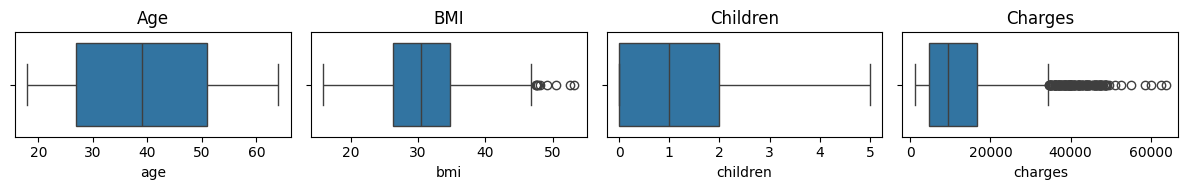

In [18]:
#use box plot to know direction of outliers
#setup the seaborn figure with subplots
fig, axes=plt.subplots(1,4,figsize=(12,2))
sns.boxplot(data=data, x='age',ax = axes[0])
axes[0].set_title("Age")
sns.boxplot(data=data, x='bmi',ax = axes[1])
axes[1].set_title("BMI")
sns.boxplot(data=data, x='children',ax = axes[2])
axes[2].set_title("Children")
sns.boxplot(data=data, x='charges',ax = axes[3])
axes[3].set_title("Charges")
plt.tight_layout()

### Insights
* we observe that bmi and charges column has some outliers


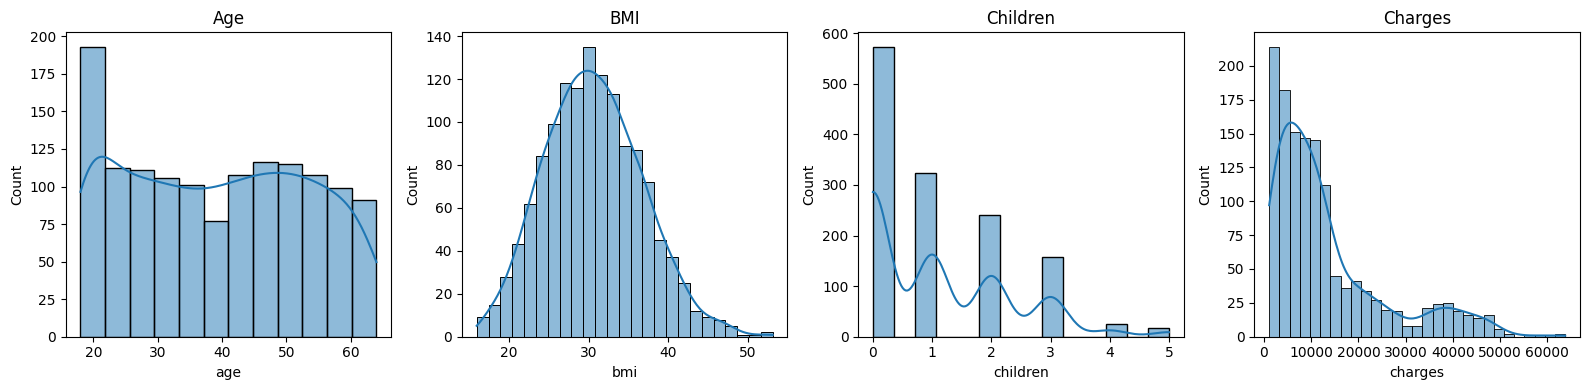

In [19]:
#use histogram plot to know the distribution
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
sns.histplot(data=data, x='age', ax=axes[0],kde=True)
axes[0].set_title("Age")
sns.histplot(data=data, x='bmi',ax = axes[1],kde=True)
axes[1].set_title("BMI")
sns.histplot(data=data, x='children',ax = axes[2],kde=True)
axes[2].set_title("Children")
sns.histplot(data=data, x='charges',ax = axes[3],kde=True)
axes[3].set_title("Charges")
plt.tight_layout()

### Insights
* From the plots we can say that bmi as normal distribution and charges are right skewed.

### How to find Outliers?

* 3 sigma rule
* IQR

**3-sigma rule**
* It is used when distribution of data is normal
* low_limit = mean - 3 * std
* upper_limit = mean + 3 * std
* Outliers are the values which are greater than upper limit or lesser than the lower limit

In [20]:
#clearly bmi shows normal distributions so we use 3-sigma rule to identify outliers
lower_limit = data['bmi'].mean() - 3 * data['bmi']. std()
upper_limit = data['bmi'].mean() + 3 * data['bmi']. std()
print('lower limit',lower_limit)
print('upper limit',upper_limit)


lower limit 12.362046528819015
upper limit 48.96485698651382


In [21]:
#what values are less than lower limit and greater than upper limit
data[(data['bmi']< lower_limit) |(data['bmi']> upper_limit)]


age   sex    bmi  children smoker     region     charges
116    58  male  49.06         0     no  southeast  11381.3254
847    23  male  50.38         1     no  southeast   2438.0552
1047   22  male  52.58         1    yes  southeast  44501.3982
1317   18  male  53.13         0     no  southeast   1163.4627

### Insights
* There are 4 outliers in bmi column

### How to handle Outliers ?
* Outliers are handled only if % of outliers is less than 5 %
* When data is normal(3-sigma rule) replace with mean


In [22]:
#find % of outliers in bmi
len(data[(data['bmi']< lower_limit) |(data['bmi']> upper_limit) ])/len(data) *100


0.2991772625280479

In [23]:
#we have 0.2 % outliers which is less than 5 %, so replace outliers with mean
data.loc[(data['bmi']< lower_limit) |(data['bmi']> upper_limit),'bmi'] = data['bmi'].mean()

In [24]:
data[(data['bmi']< lower_limit) |(data['bmi']> upper_limit)]

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

**IQR method**
* If data is skewed use IQR(Interquartile range method)
* low_limit = Q1 -1.5 * IQR
* upper_limit = Q3 + 1.5 * IQR
* Q1 = lower quartile
* Q3 = upper quartile
* IQR=Q3-Q1

In [25]:
# charges distribution is right skewed so will use IQR method
Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1
print("lower quartile(Q1)",Q1)
print("upper quartile(Q3)",Q3)
print("IQR",IQR)

lower quartile(Q1) 4746.344
upper quartile(Q3) 16657.71745
IQR 11911.37345


In [26]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('lower limit', lower_limit)
print('upper limit', upper_limit)

lower limit -13120.716174999998
upper limit 34524.777625


In [27]:
data[(data['charges']< lower_limit) | (data['charges']> upper_limit)]

age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]

In [28]:
len(data[(data['charges']< lower_limit) | (data['charges']> upper_limit)])/ len(data)*100

10.396409872849663

In [30]:
#since % of outliers in charges are more than 5% we don't handle , they are adding some value to the data

### Step 4 : Exploratory Data Analysis(EDA)

**1. Univariate :  It focuses on understanding the distribution and characteristics of a single variable.**
* Histograms: Displays the frequency distribution of numerical data.
* Box plots: Summarizes the distribution of numerical data, highlighting outliers.
* Count plot : to find unique value.

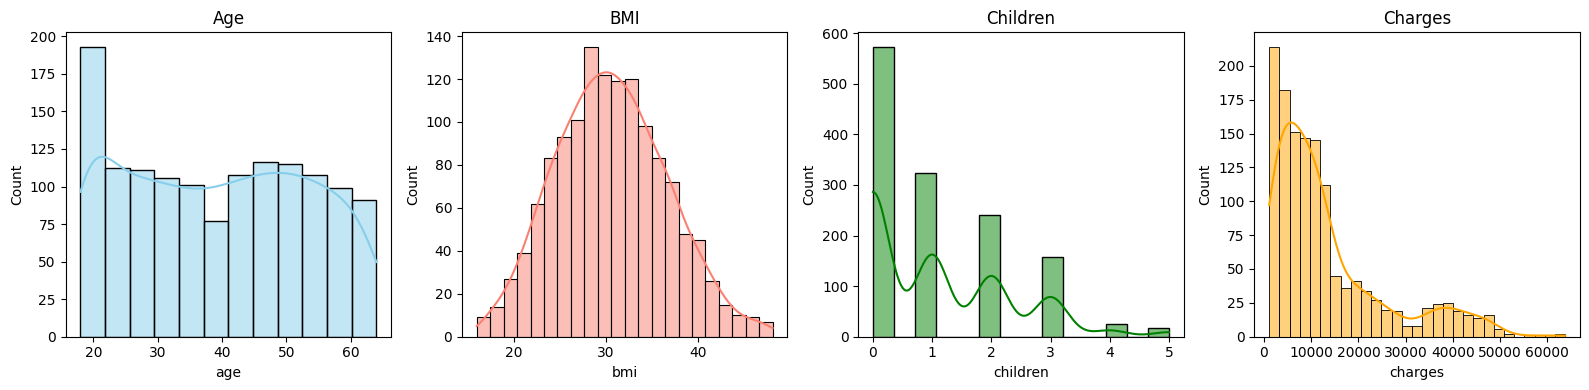

In [29]:
#use histogram plot to know the distribution
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
sns.histplot(data=data, x='age', ax=axes[0], color='skyblue', kde=True)
axes[0].set_title("Age")
sns.histplot(data=data, x='bmi', ax=axes[1], color='salmon', kde=True)
axes[1].set_title("BMI")
sns.histplot(data=data, x='children', ax=axes[2], color='green', kde=True)
axes[2].set_title("Children")
sns.histplot(data=data, x='charges', ax=axes[3], color='orange', kde=True)
axes[3].set_title("Charges")
plt.tight_layout()


### Insights
* Most of the customers age is between 20 to 60 years, indicating a focus on adults in the dataset.
* BMI exhibits the normal distribution, forming a bell shaped curve.
* Children column has discrete values.
* Charges exhibit a right-skewed distribution, with most customers facing lower costs and a few outliers with significantly higher charges.

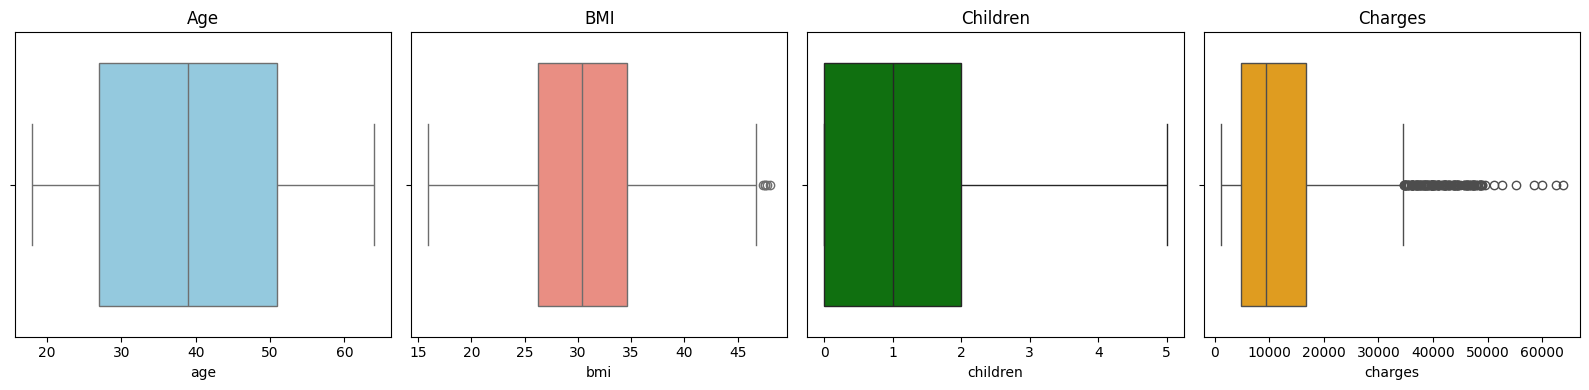

In [30]:
#use Box plot to know the outliers
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
sns.boxplot(data=data, x='age', ax=axes[0], color='skyblue')
axes[0].set_title("Age")
sns.boxplot(data=data, x='bmi', ax=axes[1], color='salmon')
axes[1].set_title("BMI")
sns.boxplot(data=data, x='children', ax=axes[2], color='green')
axes[2].set_title("Children")
sns.boxplot(data=data, x='charges', ax=axes[3], color='orange')
axes[3].set_title("Charges")
plt.tight_layout()

### Insights
* Outliers are seen in BMI  and charges towards right.

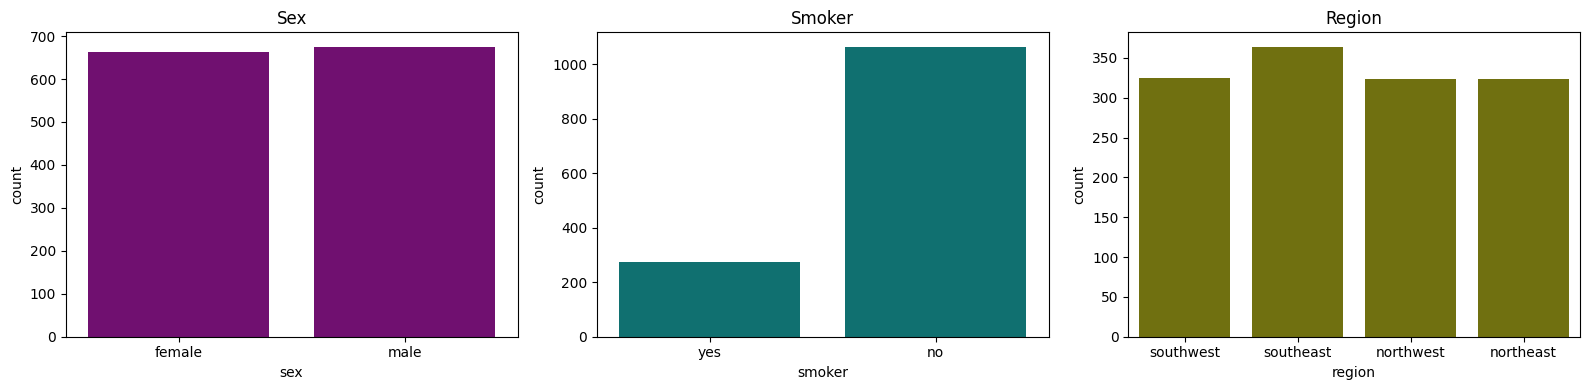

In [31]:
#use Count plot to know the unique values
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
sns.countplot(data=data, x='sex', ax=axes[0], color='purple')
axes[0].set_title("Sex")
sns.countplot(data=data, x='smoker', ax=axes[1], color='teal')
axes[1].set_title("Smoker")
sns.countplot(data=data, x='region', ax=axes[2], color='olive')
axes[2].set_title("Region")
plt.tight_layout()

### Insights
* The dataset includes slightly more male data than female, indicating a slight male majority in the sex column.
* The smoker column suggests a high number of non-smokers, highlighting a majority of non-smoking individuals in the dataset.
* The region column indicates that many individuals are from the southeast region, suggesting a concentration of data from this geographic area.

**2. Bivariate: It involves examining the relationship between two variables.**

* Scatter Plot: visualizes the relationship between two continuous variables.
* Bar Plot: compares numerical values across categories of a categorical variable.


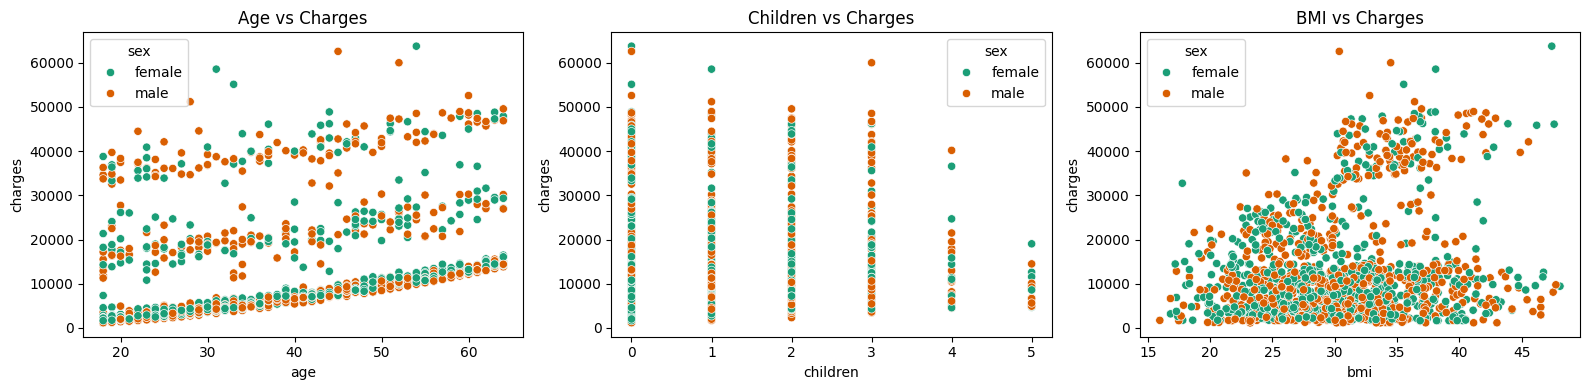

In [32]:
#use scatter plot: 2 numerical data
#relationship between age-charges, children-charges, bmi-charges
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
sns.scatterplot(data=data, x='age', y='charges', ax=axes[0], hue ='sex', palette='Dark2')
axes[0].set_title("Age vs Charges")
sns.scatterplot(data=data,  x='children', y='charges', ax=axes[1], hue='sex', palette='Dark2')
axes[1].set_title("Children vs Charges")
sns.scatterplot(data=data,  x='bmi', y='charges', ax=axes[2], hue='sex', palette='Dark2')
axes[2].set_title("BMI vs Charges")
plt.tight_layout()



### Insights
* As age increases, there is a noticeable trend of higher medical charges, indicating that older individuals tend to pay higher healthcare costs.
* There is an inverse relationship between the number of children and medical charges,as the children increases the charges are less.
* As bmi increases charges also increases.

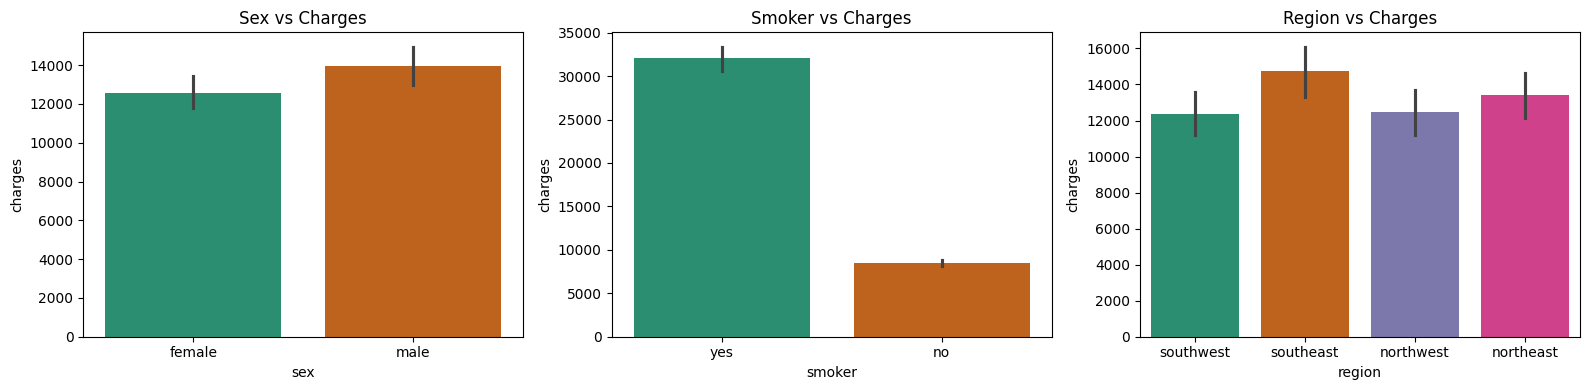

In [33]:
#use bar plot:1 numerical and 1 categorical
#relationship between sex-charges, smoker-charges, region-charges
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
sns.barplot(data=data, x='sex', y='charges', ax=axes[0], palette='Dark2')
axes[0].set_title("Sex vs Charges")
sns.barplot(data=data,  x='smoker', y='charges', ax=axes[1], palette='Dark2')
axes[1].set_title("Smoker vs Charges")
sns.barplot(data=data,  x='region', y='charges', ax=axes[2], palette='Dark2')
axes[2].set_title("Region vs Charges")
plt.tight_layout()

### Insights
* Males show higher medical charges compared to females
* Smokers exhibit higher medical charges, likely due to increased health risks associated with smoking-related diseases.
* Medical charges are notably higher for individuals residing in the Southeast region compared to other regions, suggesting regional variations in healthcare costs.

**3. Multivariate: used to examine patterns and relationships involving multiple variables simultaneously**
* Pairplot : It creates a grid of scatterplots and histograms where each variable in a dataset is plotted against every other variable.
* Heatmap:  It is commonly used to visualize the correlation matrix of a dataset, showing the relationships between multiple variables.

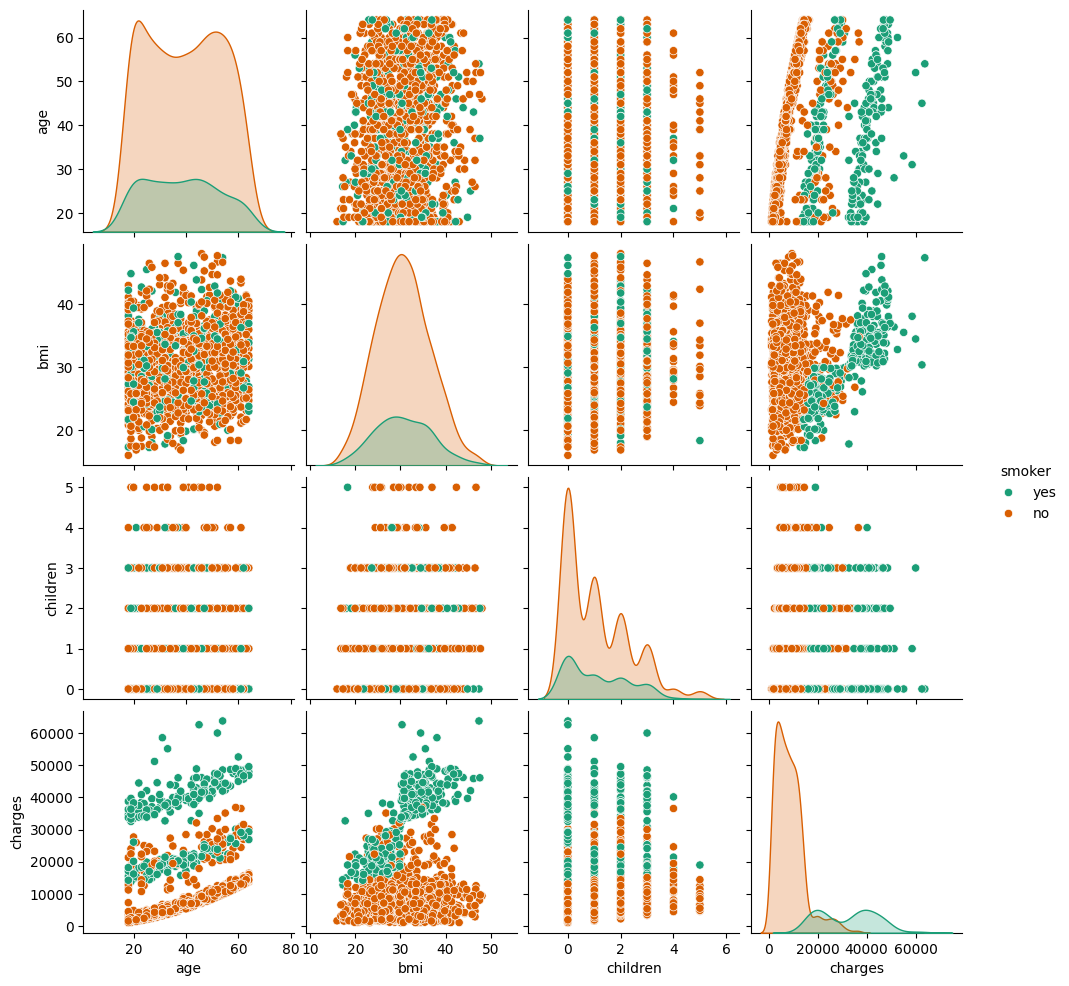

In [34]:
#pair plot for all the numerical columns
sns.pairplot(data,hue='smoker',palette='Dark2')

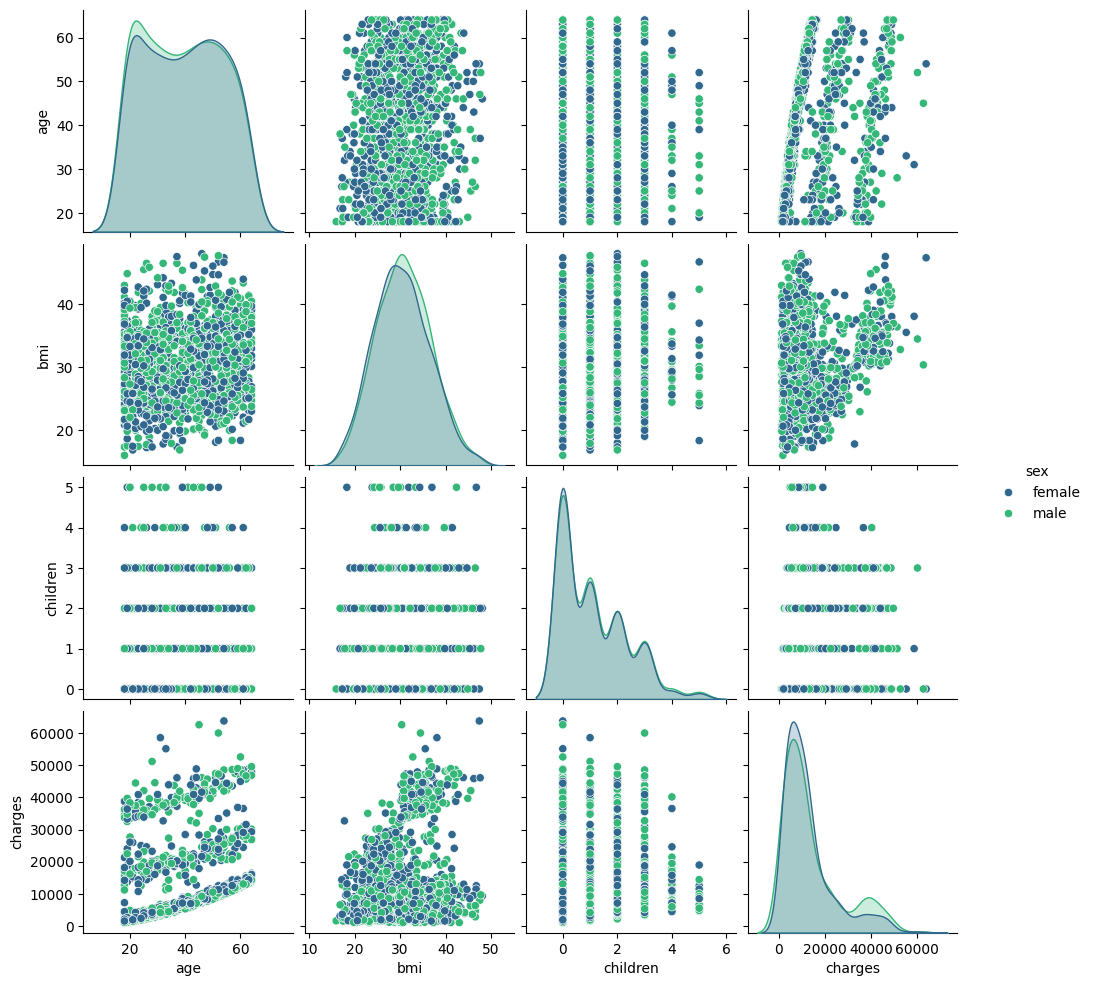

In [35]:
sns.pairplot(data,hue='sex',palette='viridis')

In [36]:
#before plotting heat map we need to find the correlation for num_data
num_data.corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

<Axes: >

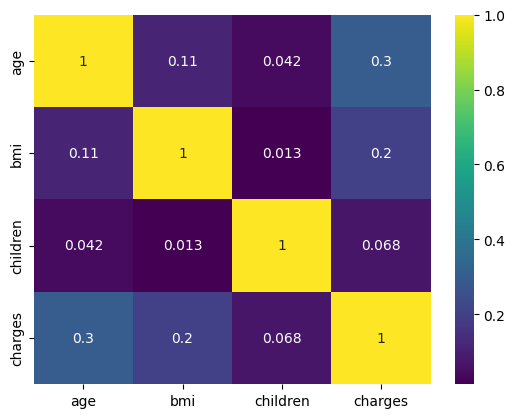

In [37]:
#heat map for num_data
sns.heatmap(num_data.corr(),annot=True, cmap='viridis')

### Insights
**1. Age and Charges :** There is a moderate positive correlation (0.3) between age and insurance charges. This suggests that as age increases, insurance charges tend to increase as well. This could be due to older individuals generally requiring more medical care.

**2. BMI and Charges :** There is a mild positive correlation (0.2) between BMI and insurance charges. This indicates that higher BMI is associated with higher insurance charges on average. This could be because individuals with higher BMI may have higher risks of certain health conditions.

**3. Children and Charges :** There is a weak positive correlation (0.068) between the number of children and insurance charges. This suggests that having more children may slightly increase insurance charges, though the effect is not very strong based on this correlation coefficient.

**4. Age and BMI :** There is a very weak positive correlation (0.11) between age and BMI. This implies that as age increases, BMI might also increase slightly, but the correlation is not strong.



### Step 5: Data Preprocessing

#### 5.1. Feature Engineering

#### 5.1.1 Scaling
Scaling is used to transform continuous input variables into a certain scales.
Used in distance based Algorithms
* Min Max scaler
* Standard scaler

**1. Min Max scaler**
* It transforms all the values within a range of 0 to 1.
* min_max = ( x - x_min ) / ( x_max - x_min )

**2. Standard Scaler**
* It transforms all the values into standard normal distribution(mean = 0, sd = 1).
* z = x - mean / standard deviation

In [38]:
df1 = data.copy()

In [39]:
#apply min max scaler only to continuous numerical data(age, bmi)
#scaling is always applied to input variables
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
df1[['age']]=scaling.fit_transform(df1[['age']])
df1[['bmi']]=scaling.fit_transform(df1[['bmi']])

In [40]:
df1.head()

age     sex       bmi  children smoker     region      charges
0  0.021739  female  0.371847         0    yes  southwest  16884.92400
1  0.000000    male  0.554656         1     no  southeast   1725.55230
2  0.217391    male  0.530676         3     no  southeast   4449.46200
3  0.326087    male  0.210059         0     no  northwest  21984.47061
4  0.304348    male  0.402367         0     no  northwest   3866.85520

**Note**
* Scaling is applied on input continuos numerical values
* Scaling is not applied on target / output column
* minmax scaler : normalization(0 - 1)
* standard scaler: standerdization(mean = 0, sd = 1)
* scaling is important for distance based algorithms
* not important for tree based algorithms

#### 5.1.2. Encoding Process

Encoding is used to convert categorical data into numerical data that can be utilized by machine learning algorithms.
* Label Encoder
* One Hot Encoder /dummies
* Manual Encoder
* Frequency Encoder


In [41]:
# label encoder: Converts categories to integers
#use label encoder when there is no priority issue
#It encodes values based on alphabetical order
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df1['smoker']=le.fit_transform(df1['smoker'])

In [42]:
# one hot encoder: Converts categories to binary columns
df1=pd.get_dummies(df1,columns=['sex'],dtype=int,drop_first=True)

In [43]:
# use map function  southwest:0 , northwest:1 , northeast:2 , southeast:3
df1['region']=df1['region'].map({'southwest':0,'northwest':1,'northeast':2,'southeast':3})

#### 5.1.3. Transformations
Transformations helps in making the target variable more normally distributed, which can enhance the performance of regression models.

 * Log Transformation: Use for highly right-skewed data.


In [44]:
#our target variable is charges
#since it is highly right skewed we use log transformation
df1['charges']=np.log(df1.charges)

In [45]:
df1.head()

age       bmi  children  smoker  region   charges  sex_male
0  0.021739  0.371847         0       1       0  9.734176         0
1  0.000000  0.554656         1       0       3  7.453302         1
2  0.217391  0.530676         3       0       3  8.400538         1
3  0.326087  0.210059         0       0       1  9.998092         1
4  0.304348  0.402367         0       0       1  8.260197         1

In [46]:
# Reorder columns
df1 = df1[['age', 'sex_male', 'bmi', 'smoker','children', 'region', 'charges']]

### 5.2. Feature Selection

In [47]:
#We are selecting all the features from the dataset, as it contains six features and all are relevant for the modelling.

### 5.3. Data Splitting

In [48]:
#split the data into features(x) and target(y)
X = df1.drop('charges',axis=1)
y = df1['charges']

In [49]:
X.head()

age  sex_male       bmi  smoker  children  region
0  0.021739         0  0.371847       1         0       0
1  0.000000         1  0.554656       0         1       3
2  0.217391         1  0.530676       0         3       3
3  0.326087         1  0.210059       0         0       1
4  0.304348         1  0.402367       0         0       1

In [50]:
#split the data into training and testing sets i.e 70-30 or 80-20
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Step 6: Modelling



* Model Training 
* Model Evaluation
* Hyper-parameter Tuning




In [51]:
#import packages
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,make_scorer
from sklearn.model_selection import GridSearchCV

#### 1. Linear Regression

In [52]:
#Linear Regression
from tabulate import tabulate
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

# Calculate the performance metrics
mae = mean_absolute_error(y_test,lr_pred)
mse = mean_squared_error(y_test,lr_pred)
rmse = np.sqrt(mse)
r2_lr = r2_score(y_test,lr_pred)

metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [mae, mse, rmse, r2_lr]
})

print("Linear Regression Metrics")
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False))

Linear Regression Metrics
+-----------+--------------------+
|  Metric   |       Value        |
+-----------+--------------------+
|    MAE    | 0.2687999293711814 |
|    MSE    | 0.1660587489405741 |
|   RMSE    | 0.407503066173218  |
| R-squared | 0.821092095582562  |
+-----------+--------------------+


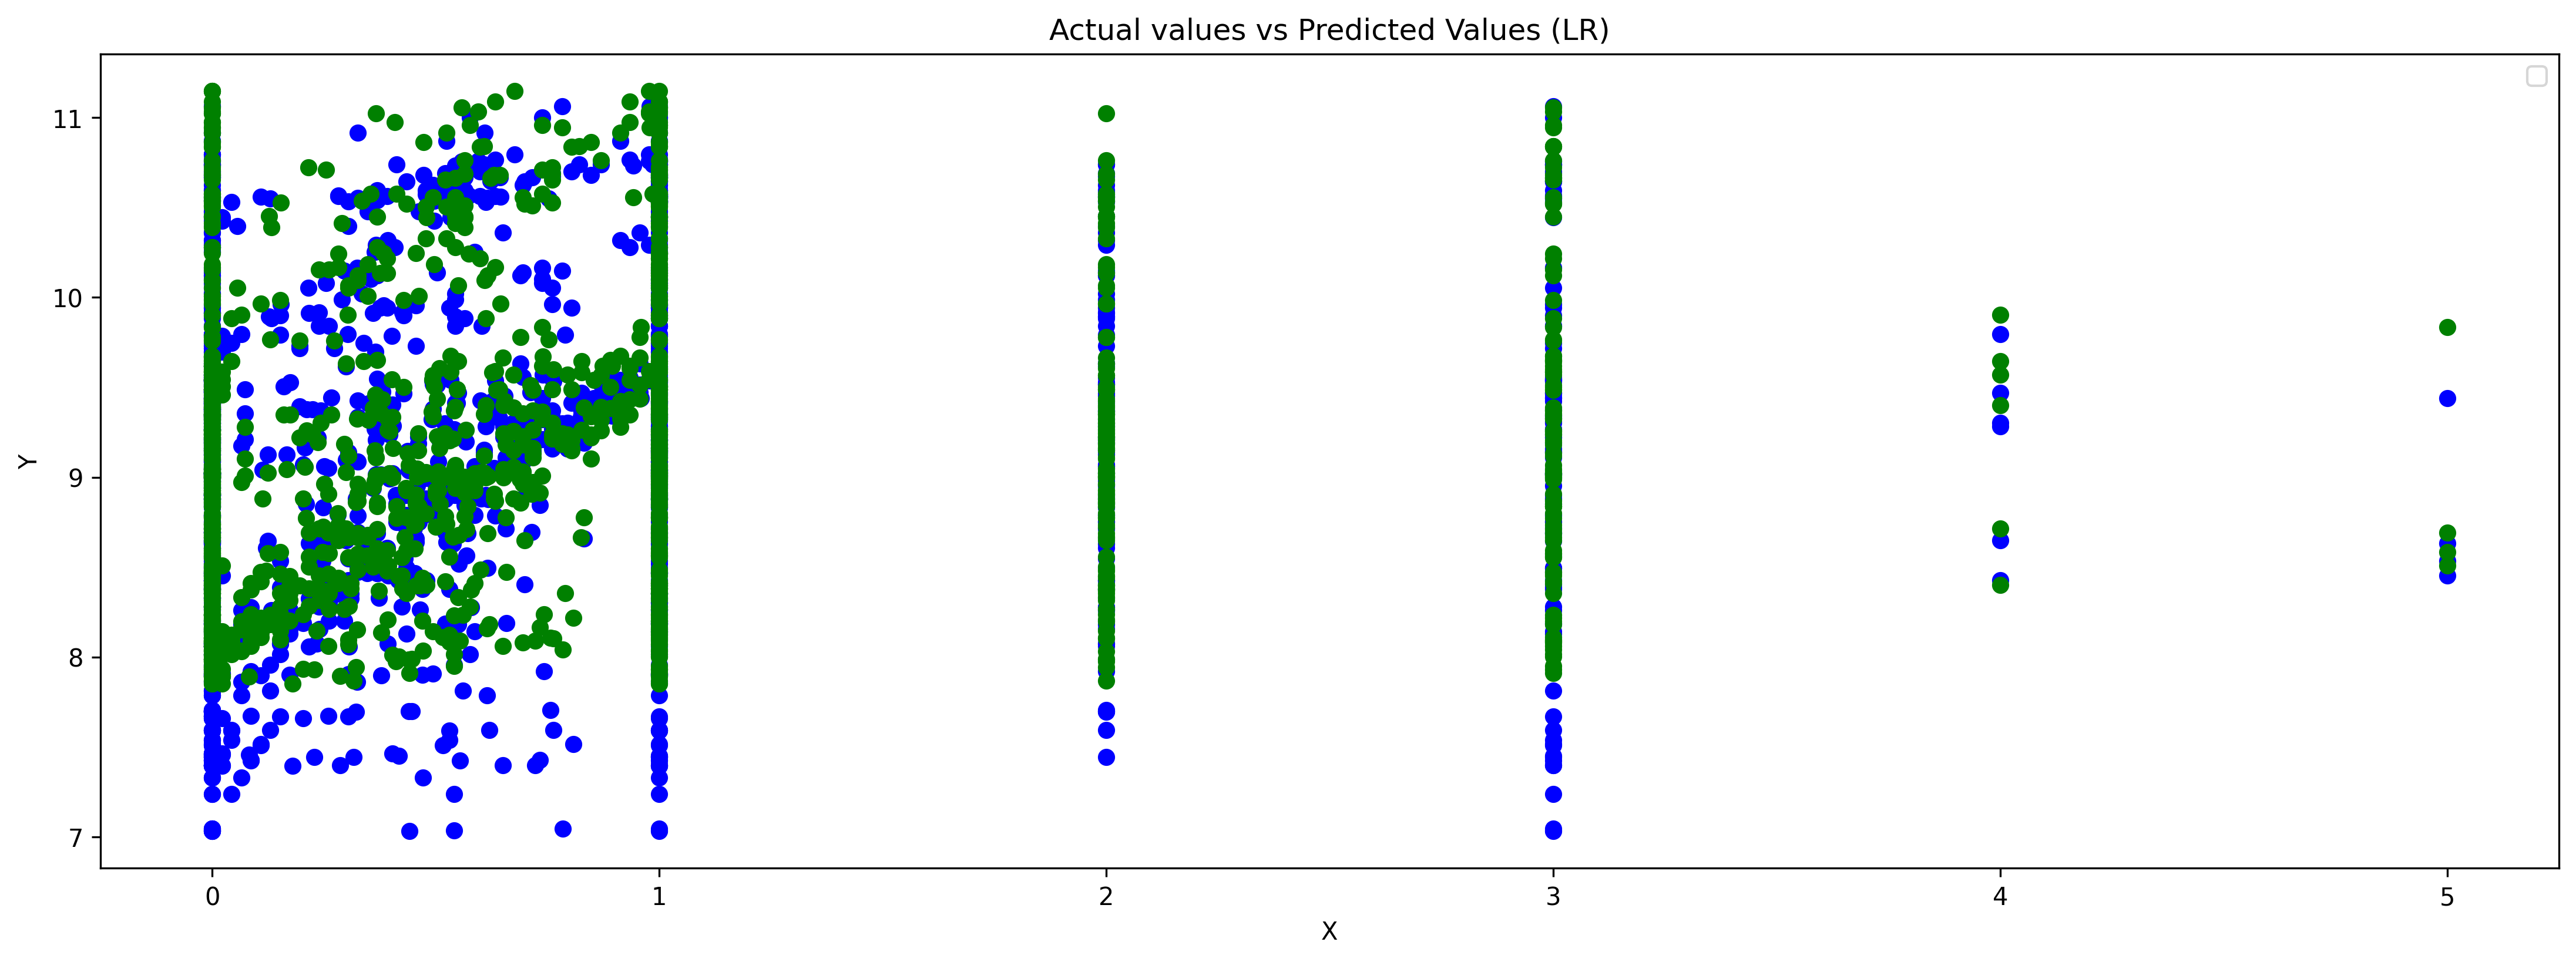

In [61]:
#actual and predicted charges graph
plt.figure(figsize=(18, 6),dpi=300)
plt.plot(X_test, y_test, 'bo')
plt.plot(X_test, lr_pred, 'go')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual values vs Predicted Values (LR)')
plt.legend()
plt.show()

### 2. Decision Tree Regression

In [54]:
#Decision Tree Regression
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)

# Calculate the performance metrics
mae = mean_absolute_error(y_test,dt_pred)
mse = mean_squared_error(y_test,dt_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,dt_pred)

metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [mae, mse, rmse, r2]
})

print("Decision Tree Regression Metrics")
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False))

Decision Tree Regression Metrics
+-----------+---------------------+
|  Metric   |        Value        |
+-----------+---------------------+
|    MAE    | 0.23287667770359965 |
|    MSE    | 0.2873090183601314  |
|   RMSE    | 0.5360121438550915  |
| R-squared | 0.6904598238697017  |
+-----------+---------------------+


In [55]:
#with hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None, 'sqrt', 'log2']
}

dt = DecisionTreeRegressor()
dt_scoring = make_scorer(mean_squared_error, greater_is_better=False)
dt_grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring=dt_scoring, cv=5)
dt_grid_search.fit(X_train, y_train)

# Get the best parameters and best model
dt_best_params = dt_grid_search.best_params_
dt_best_model = dt_grid_search.best_estimator_
dt_pred_ = dt_best_model.predict(X_test)

# Calculate the performance metrics
mae = mean_absolute_error(y_test, dt_pred_)
mse = mean_squared_error(y_test, dt_pred_)
rmse = np.sqrt(mse)
r2_dt = r2_score(y_test, dt_pred_)

metrics_df = pd.DataFrame({
    'Metric': ['Best Parameters','MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [dt_best_params,mae, mse, rmse, r2_dt]
})

print("Decision Tree Regression Metrics after Hyper-parameter Tuning")
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False))

Decision Tree Regression Metrics after Hyper-parameter Tuning
+-----------------+----------------------------------------------------------------------------------------+
|     Metric      |                                         Value                                          |
+-----------------+----------------------------------------------------------------------------------------+
| Best Parameters | {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 2} |
|       MAE       |                                  0.21222340707712256                                   |
|       MSE       |                                  0.14449835639155031                                   |
|      RMSE       |                                  0.38012939427456843                                   |
|    R-squared    |                                   0.8443207702171251                                   |
+-----------------+-----------------------------------------------

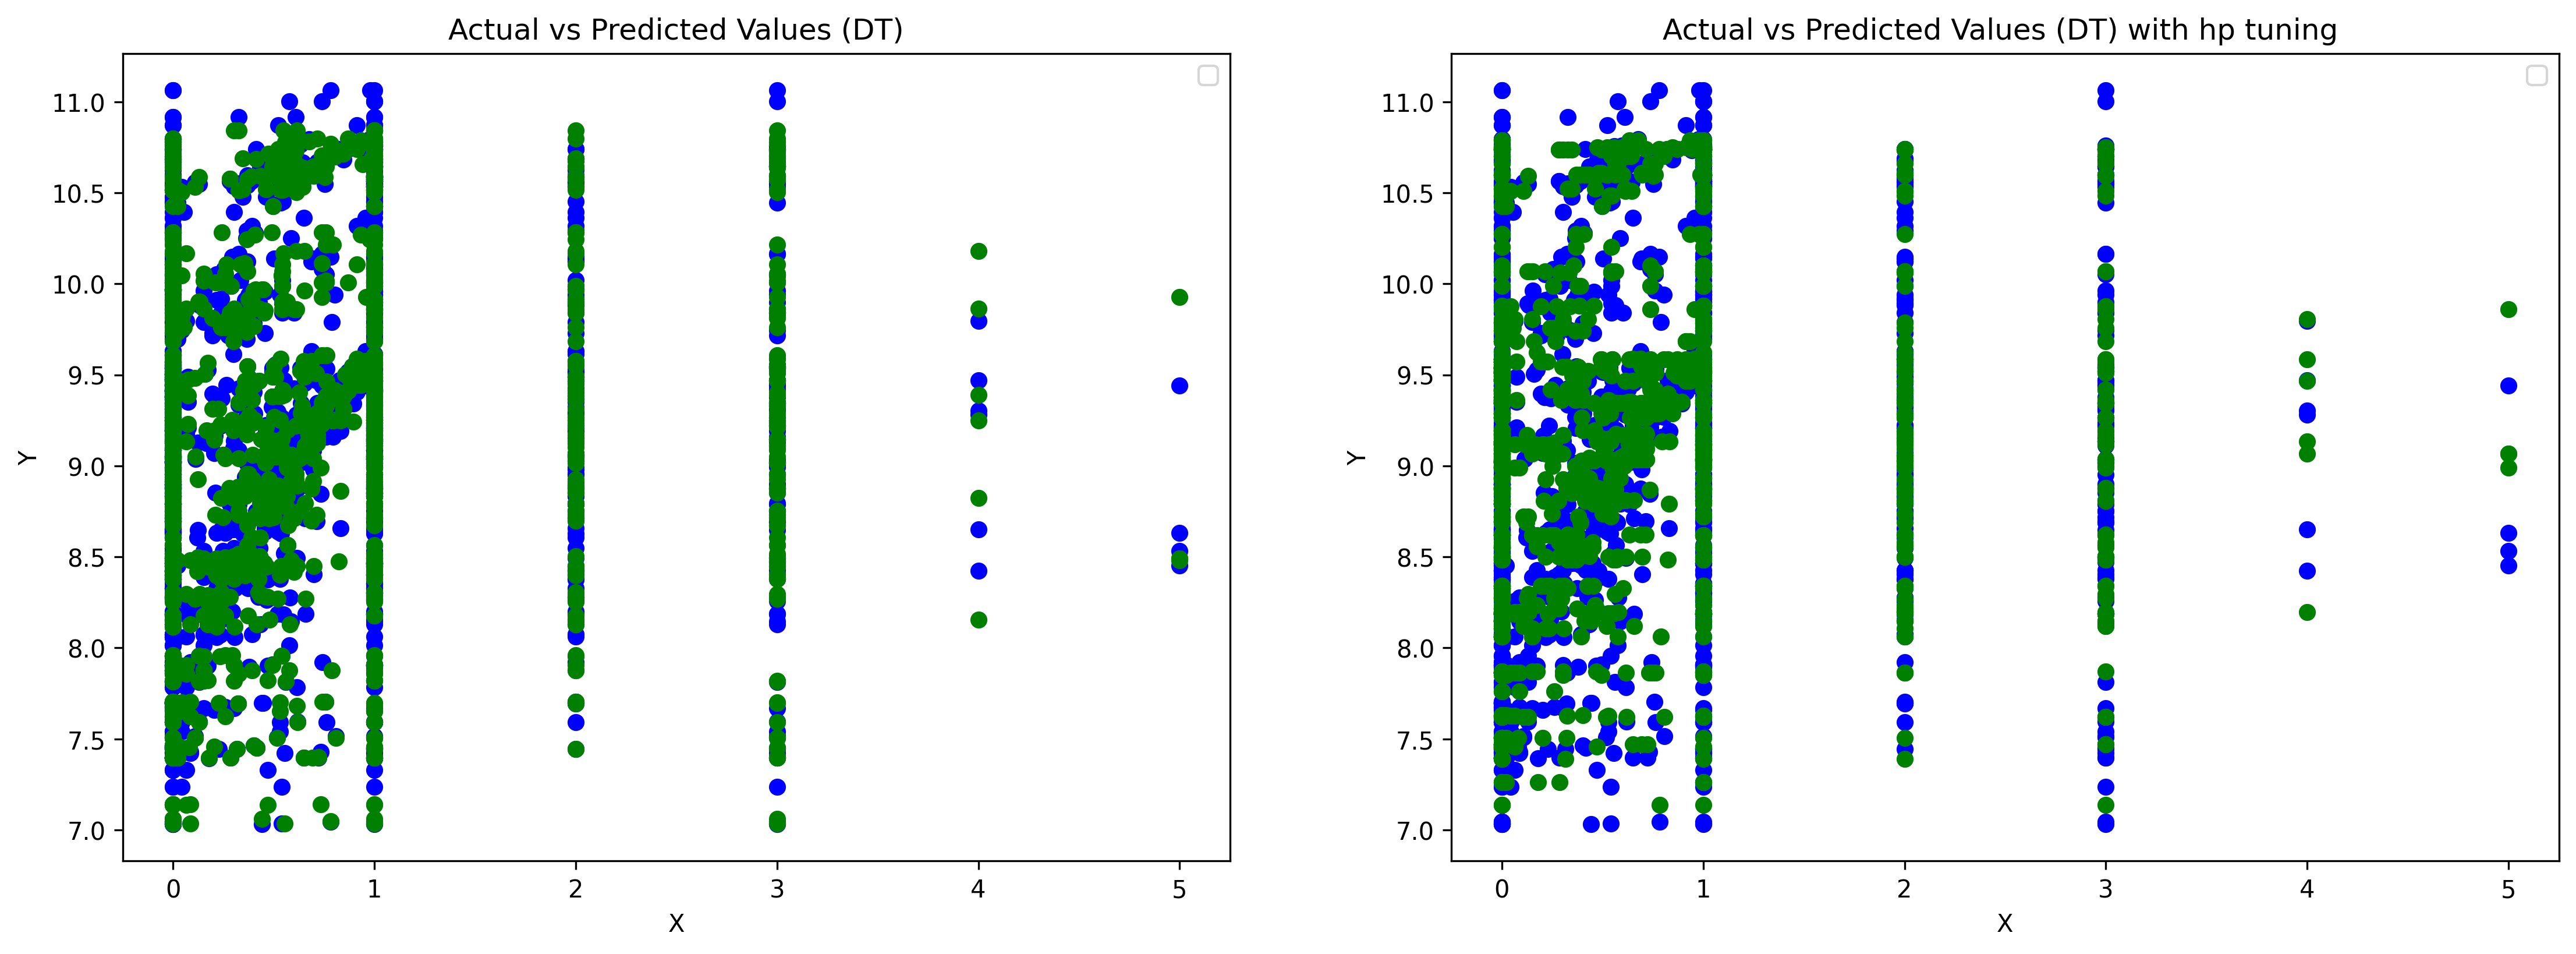

In [63]:
#actual v/s predicted charges graph
plt.figure(figsize=(18, 6),dpi=300)

plt.subplot(1,2,1)
plt.plot(X_test, y_test, 'bo', )
plt.plot(X_test, dt_pred, 'go', )
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs Predicted Values (DT)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(X_test, y_test, 'bo')
plt.plot(X_test, dt_pred_, 'go')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs Predicted Values (DT) with hp tuning ')
plt.legend()
plt.show()

### 3. K-Nearest Neighbors Regression

In [58]:
#K-Nearest Neighbors Regression (KNN)
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)

# Calculate the performance metrics
mae = mean_absolute_error(y_test,knn_pred)
mse = mean_squared_error(y_test,knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,knn_pred)

metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [mae, mse, rmse, r2]
})

print("K-Nearest Neighbors Regression Metrics")
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False))

K-Nearest Neighbors Regression Metrics
+-----------+---------------------+
|  Metric   |        Value        |
+-----------+---------------------+
|    MAE    | 0.27704332758029215 |
|    MSE    | 0.16834870438555158 |
|   RMSE    | 0.41030318593151527 |
| R-squared | 0.8186249498736851  |
+-----------+---------------------+


In [59]:
#with hyper-parameter tuning
param_grid = {
   'n_neighbors': [3, 5, 7, 10, 15]
}

knn = KNeighborsRegressor()
knn_scoring = make_scorer(mean_squared_error, greater_is_better=False)
knn_grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring=knn_scoring, cv=5)
knn_grid_search.fit(X_train, y_train)

# Get the best parameters and best model
knn_best_params = knn_grid_search.best_params_
knn_best_model = knn_grid_search.best_estimator_
knn_pred_ = knn_best_model.predict(X_test)

mae = mean_absolute_error(y_test, knn_pred_)
mse = mean_squared_error(y_test, knn_pred_)
rmse = np.sqrt(mse)
r2_knn = r2_score(y_test, knn_pred_)

metrics_df = pd.DataFrame({
    'Metric': ['Best Parameters','MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [knn_best_params,mae, mse, rmse, r2_knn]
})

print("K-Nearest Neighbors Regression Metrics after Hyper-parameter Tuning")
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False))

K-Nearest Neighbors Regression Metrics after Hyper-parameter Tuning
+-----------------+---------------------+
|     Metric      |        Value        |
+-----------------+---------------------+
| Best Parameters | {'n_neighbors': 5}  |
|       MAE       | 0.27704332758029215 |
|       MSE       | 0.16834870438555158 |
|      RMSE       | 0.41030318593151527 |
|    R-squared    | 0.8186249498736851  |
+-----------------+---------------------+


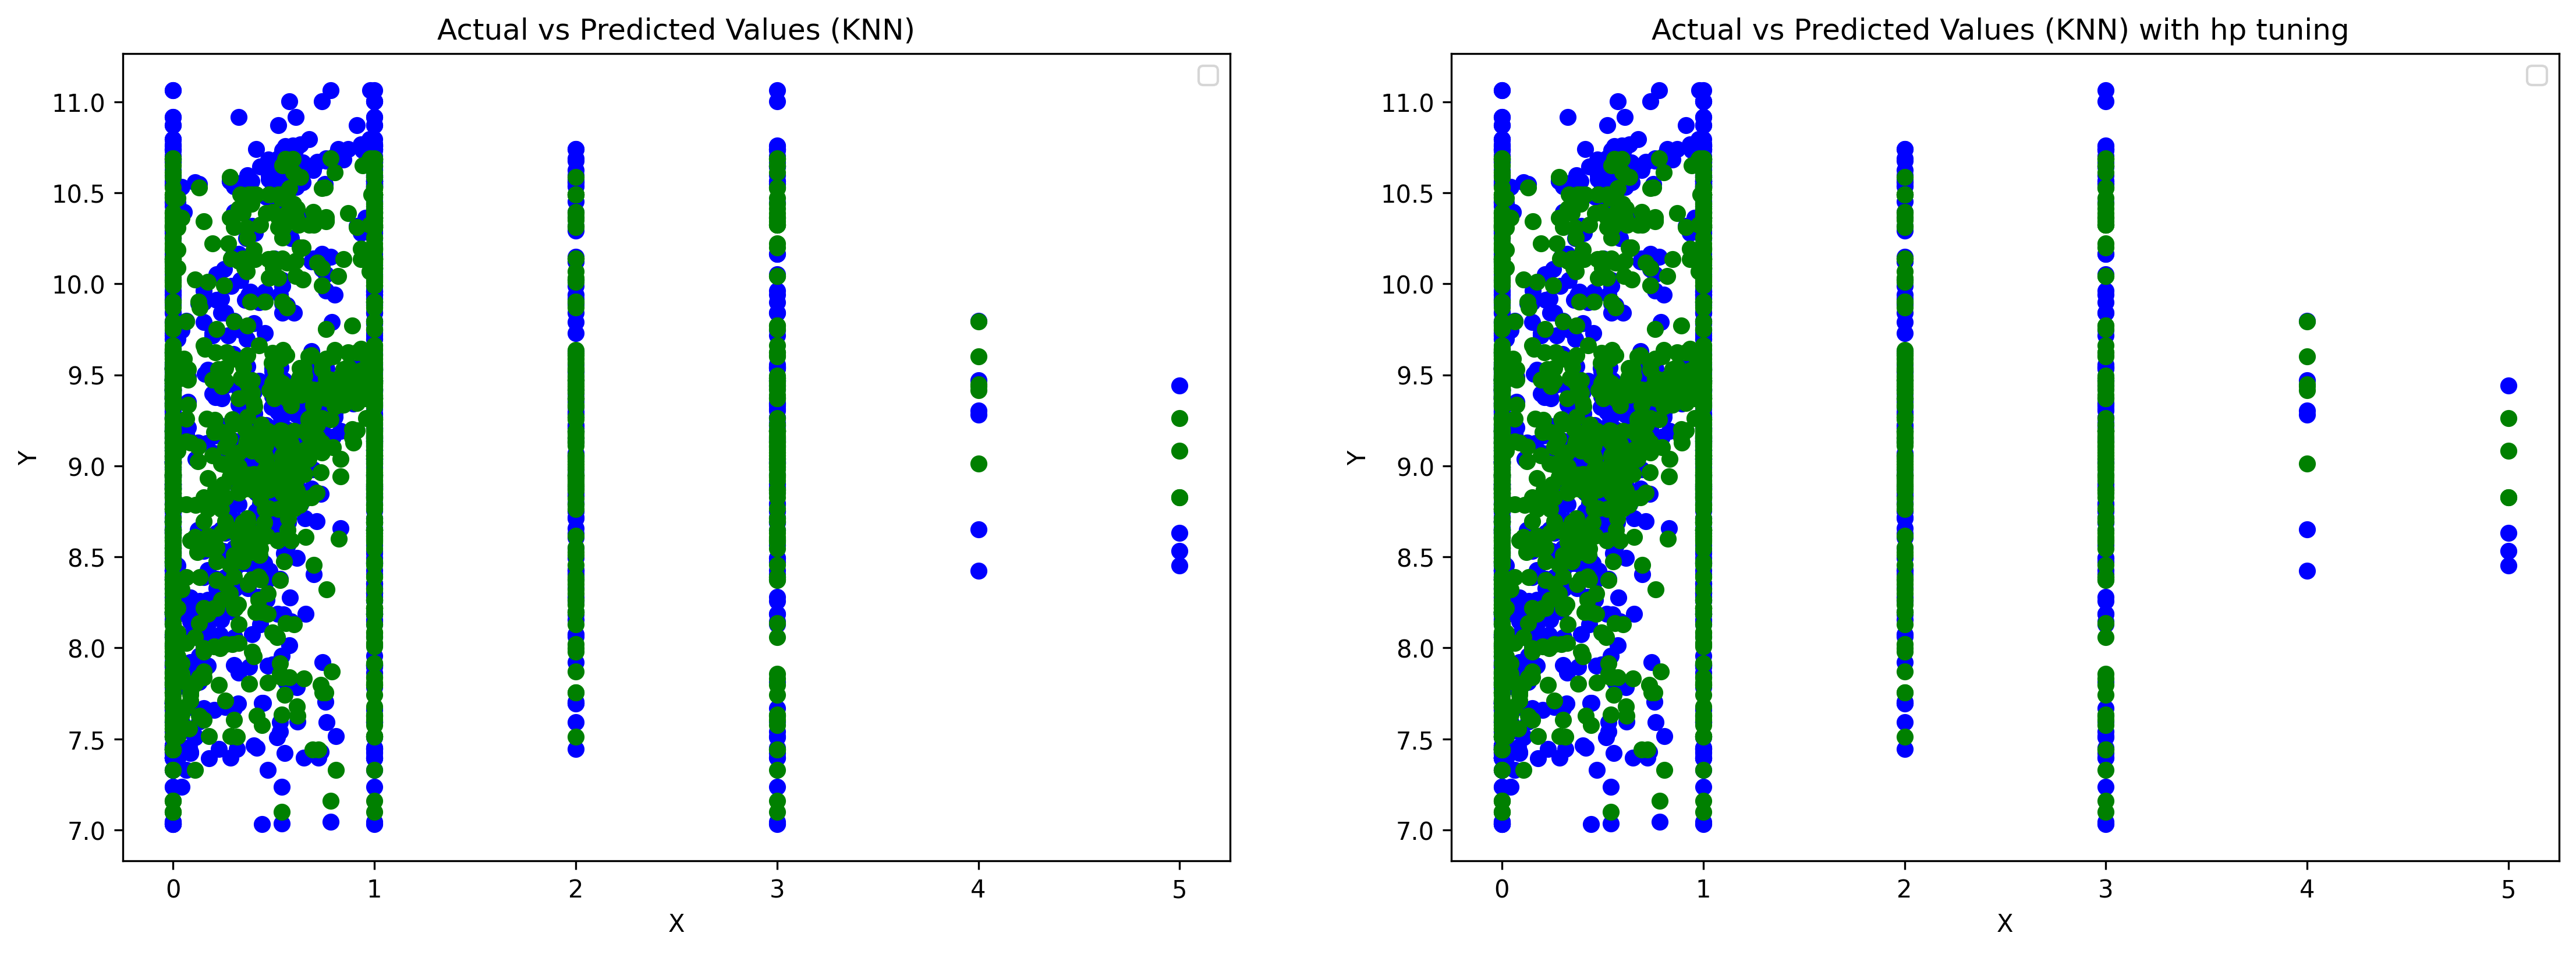

In [64]:
#actual v/s predicted charges graph
plt.figure(figsize=(18, 6),dpi=300)

plt.subplot(1,2,1)
plt.plot(X_test, y_test, 'bo', )
plt.plot(X_test, knn_pred, 'go', )
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs Predicted Values (KNN)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(X_test, y_test, 'bo')
plt.plot(X_test, knn_pred_, 'go')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs Predicted Values (KNN) with hp tuning ')
plt.legend()
plt.show()

### 4. Support Vector Regression

In [65]:
#Support Vector Machine Regression (SVM)
svm = SVR()
svm.fit(X_train,y_train)
svm_pred=svm.predict(X_test)

# Calculate the performance metrics
mae = mean_absolute_error(y_test,svm_pred)
mse = mean_squared_error(y_test,svm_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,svm_pred)

metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [mae, mse, rmse, r2]
})

print("Support Vector Regression Metrics")
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False))

Support Vector Regression Metrics
+-----------+---------------------+
|  Metric   |        Value        |
+-----------+---------------------+
|    MAE    | 0.16575808939089348 |
|    MSE    | 0.11149252565256541 |
|   RMSE    | 0.33390496500136896 |
| R-squared | 0.8798804986189187  |
+-----------+---------------------+


In [66]:
#with hyper-parameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','linear']
}

svm = SVR()
svm_scoring = make_scorer(mean_squared_error, greater_is_better=False)
svm_grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring=svm_scoring, cv=5)
svm_grid_search.fit(X_train, y_train)

# Get the best parameters and best model
svm_best_params = svm_grid_search.best_params_
svm_best_model = svm_grid_search.best_estimator_
svm_pred_ = svm_best_model.predict(X_test)

# Calculate the performance metrics
mae_svm = mean_absolute_error(y_test, svm_pred_)
mse_svm = mean_squared_error(y_test, svm_pred_)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, svm_pred_)

metrics_df = pd.DataFrame({
    'Metric': ['Best Parameters','MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [svm_best_params,mae, mse, rmse, r2_svm]
})

print("Support Vector Regression Metrics after Hyper-parameter Tuning")
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False))

Support Vector Regression Metrics after Hyper-parameter Tuning
+-----------------+-------------------------------------------+
|     Metric      |                   Value                   |
+-----------------+-------------------------------------------+
| Best Parameters | {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'} |
|       MAE       |            0.16575808939089348            |
|       MSE       |            0.11149252565256541            |
|      RMSE       |            0.33390496500136896            |
|    R-squared    |             0.88957040195157              |
+-----------------+-------------------------------------------+


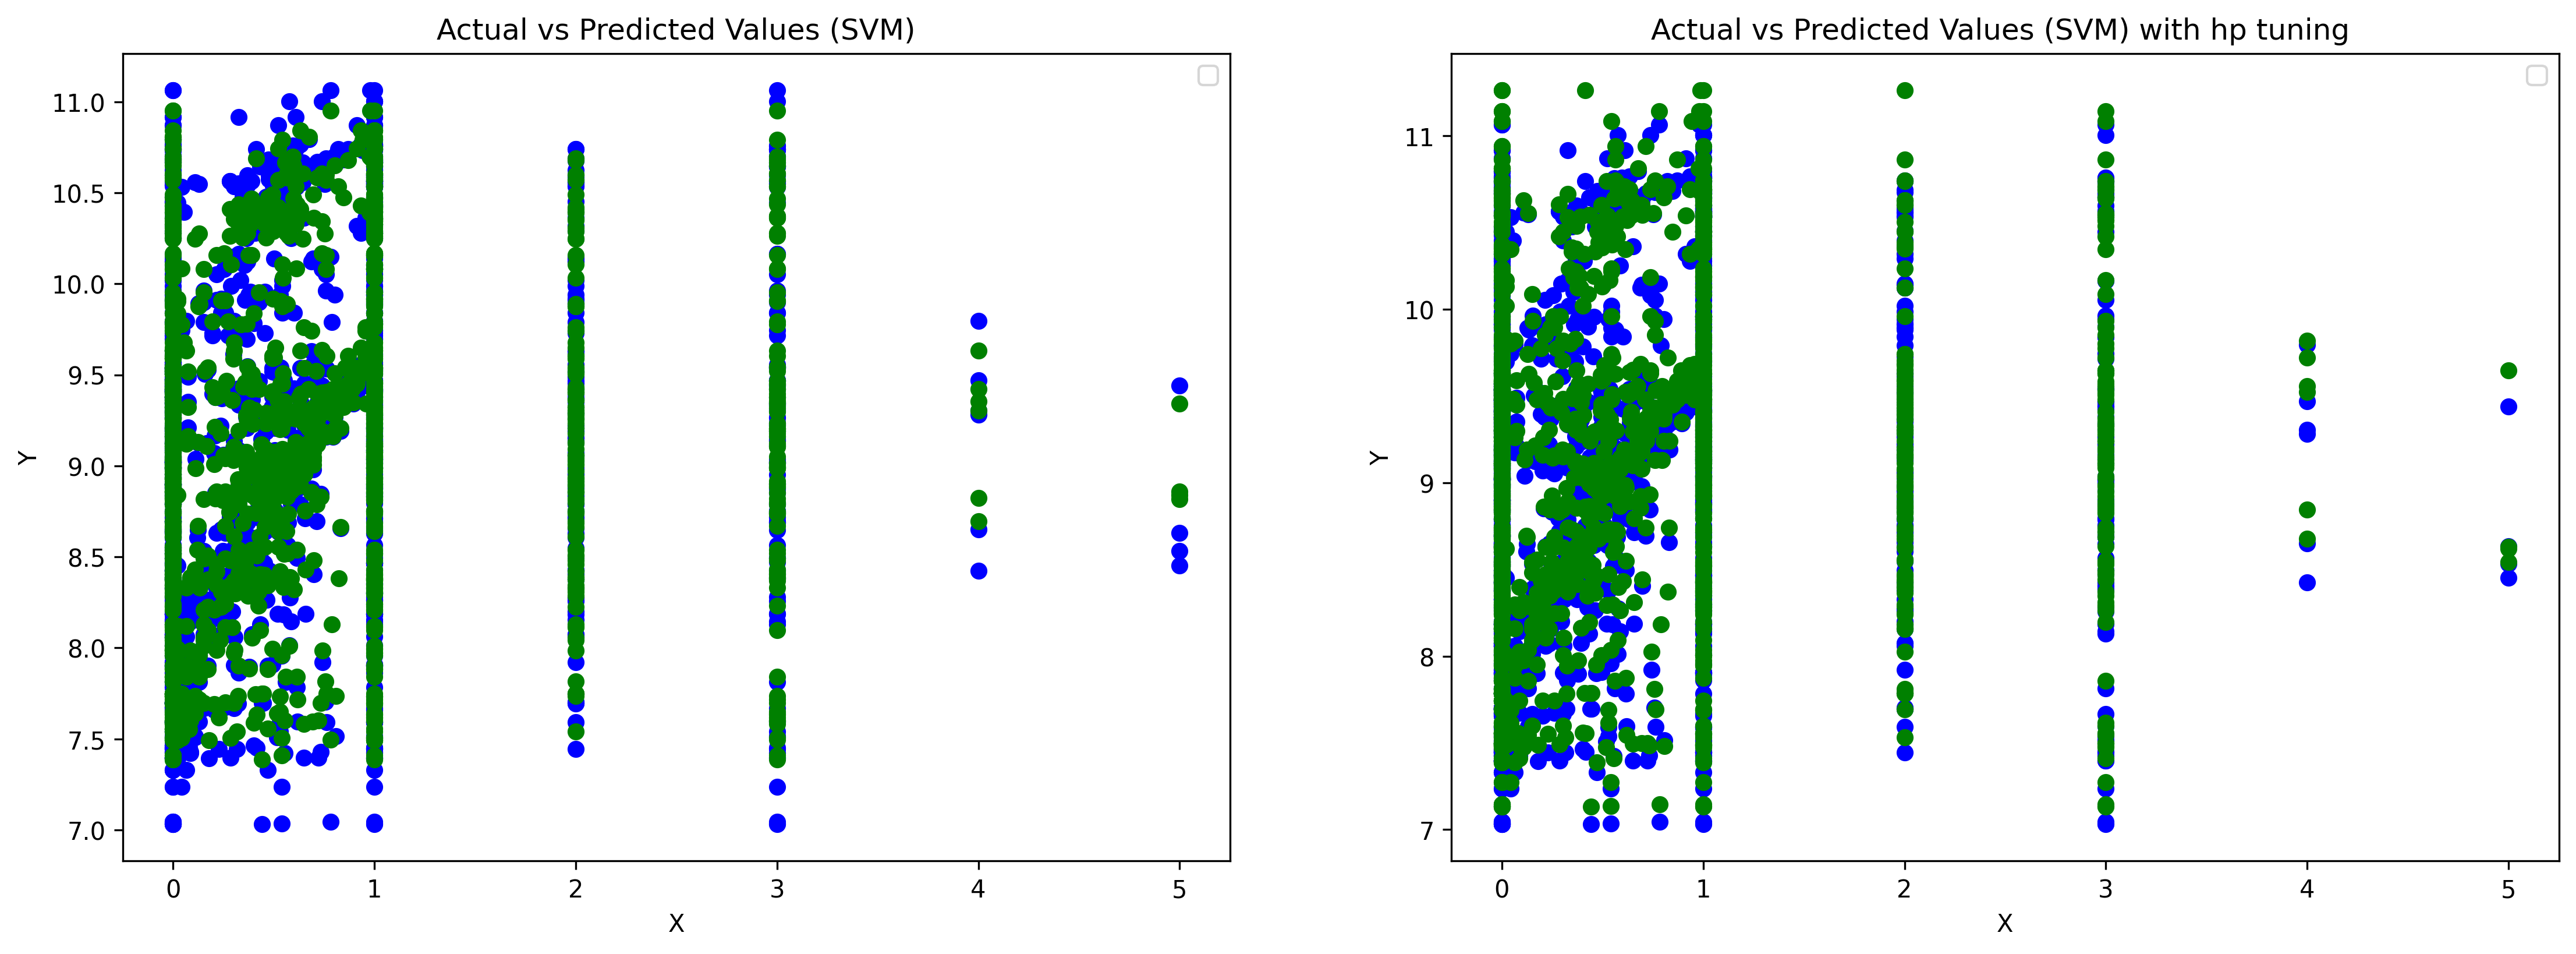

In [67]:
#actual v/s predicted charges graph
plt.figure(figsize=(18, 6),dpi=300)

plt.subplot(1,2,1)
plt.plot(X_test, y_test, 'bo', )
plt.plot(X_test, svm_pred, 'go', )
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs Predicted Values (SVM)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(X_test, y_test, 'bo')
plt.plot(X_test, svm_pred_, 'go')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs Predicted Values (SVM) with hp tuning ')
plt.legend()
plt.show()

### 5. Random Forest Regression

In [68]:
#Random Forest Regression(RF)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

# Calculate the performance metrics
mae = mean_absolute_error(y_test,rf_pred)
mse = mean_squared_error(y_test,rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,rf_pred)

metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [mae, mse, rmse, r2]
})

print("Random Forest Regression Metrics")
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False))

Random Forest Regression Metrics
+-----------+---------------------+
|  Metric   |        Value        |
+-----------+---------------------+
|    MAE    | 0.20213188863664655 |
|    MSE    | 0.14512794609273394 |
|   RMSE    | 0.3809566196993221  |
| R-squared | 0.8436424646487635  |
+-----------+---------------------+


In [69]:
# with hyper-parameter tuning
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
}

rf = RandomForestRegressor()
rf_scoring = make_scorer(mean_squared_error, greater_is_better=False)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=rf_scoring, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and best model
rf_best_params = rf_grid_search.best_params_
rf_best_model = rf_grid_search.best_estimator_
rf_pred_ = rf_best_model.predict(X_test)

# Calculate the performance metrics
mae = mean_absolute_error(y_test, rf_pred_)
mse = mean_squared_error(y_test, rf_pred_)
rmse = np.sqrt(mse)
r2_rf = r2_score(y_test, rf_pred_)

metrics_df = pd.DataFrame({
    'Metric': ['Best Parameters','MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [rf_best_params,mae, mse, rmse, r2_rf]
})

print("Random Forest Regression Metrics after Hyper-parameter Tuning")
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False))

Random Forest Regression Metrics after Hyper-parameter Tuning
+-----------------+-----------------------------------------------------------------+
|     Metric      |                              Value                              |
+-----------------+-----------------------------------------------------------------+
| Best Parameters | {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 1000} |
|       MAE       |                       0.20741178676536462                       |
|       MSE       |                       0.12508100545333067                       |
|      RMSE       |                       0.35366793105020233                       |
|    R-squared    |                       0.8652405807532025                        |
+-----------------+-----------------------------------------------------------------+


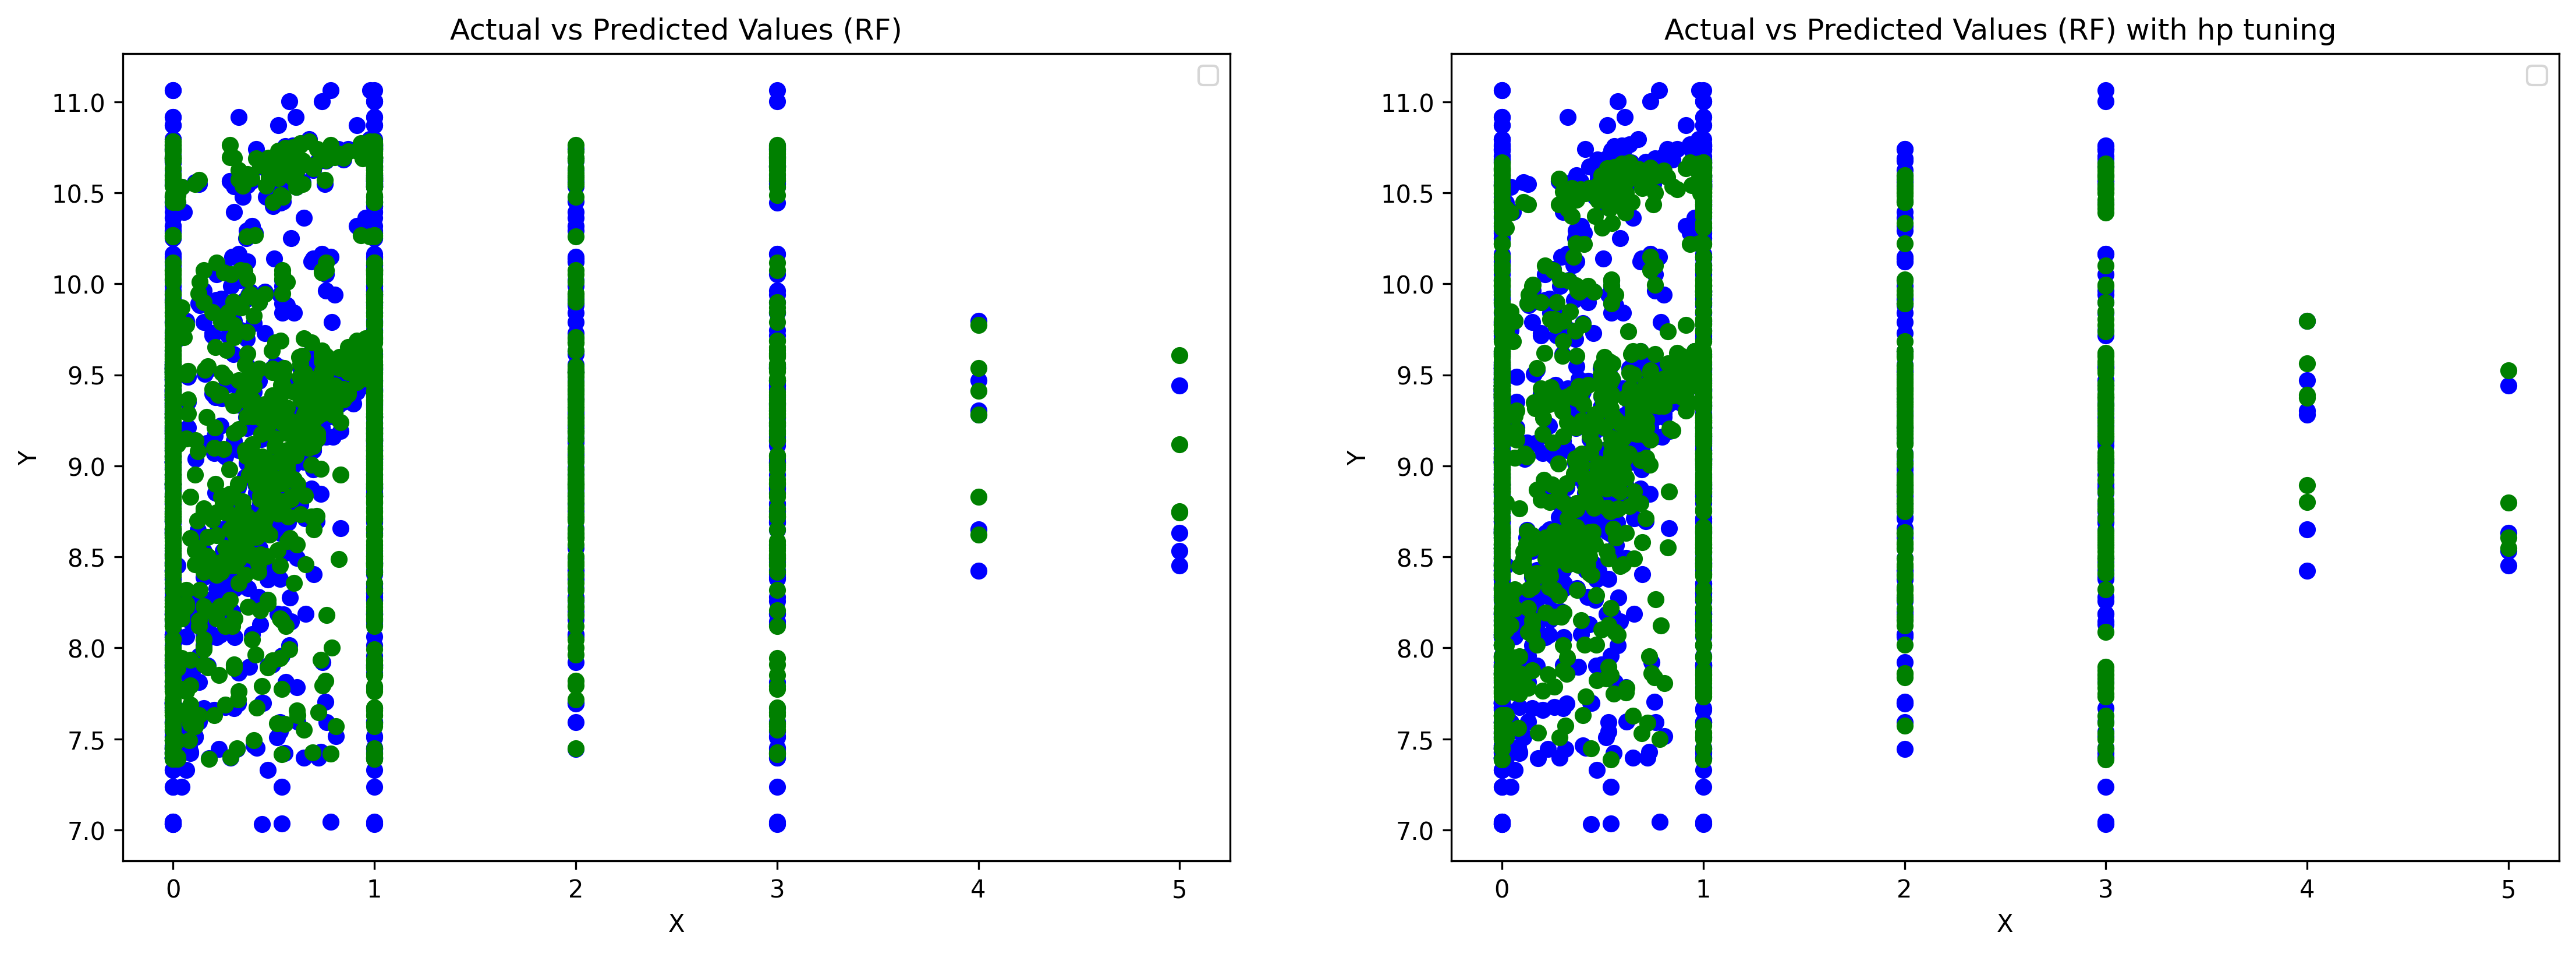

In [70]:
#actual v/s predicted charges graph
plt.figure(figsize=(18, 6),dpi=300)

plt.subplot(1,2,1)
plt.plot(X_test, y_test, 'bo', )
plt.plot(X_test, rf_pred, 'go', )
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs Predicted Values (RF)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(X_test, y_test, 'bo')
plt.plot(X_test, rf_pred_, 'go')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs Predicted Values (RF) with hp tuning ')
plt.legend()
plt.show()

### 6. Gradient Boosting Regression

In [71]:
#Gradient Boosting Regression(GB)
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)

# Calculate the performance metrics
mae = mean_absolute_error(y_test,gb_pred)
mse = mean_squared_error(y_test,gb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,gb_pred)

metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [mae, mse, rmse, r2]
})

print("Gradient Boosting Regression Metrics")
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False))

Gradient Boosting Regression Metrics
+-----------+---------------------+
|  Metric   |        Value        |
+-----------+---------------------+
|    MAE    | 0.18968403477964424 |
|    MSE    | 0.10947309464887366 |
|   RMSE    | 0.33086718581460095 |
| R-squared |  0.882056187471756  |
+-----------+---------------------+


In [72]:
#with hyper-parameter tuning
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10]
}

gb = GradientBoostingRegressor()
gb_scoring = make_scorer(mean_squared_error, greater_is_better=False)
gb_grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, scoring=gb_scoring, cv=5, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

# Get the best parameters and best model
gb_best_params = gb_grid_search.best_params_
gb_best_model = gb_grid_search.best_estimator_
gb_pred_ = gb_best_model.predict(X_test)

# Calculate the performance metrics
mae = mean_absolute_error(y_test, gb_pred_)
mse = mean_squared_error(y_test, gb_pred_)
rmse = np.sqrt(mse)
r2_gb = r2_score(y_test, gb_pred_)

metrics_df = pd.DataFrame({
    'Metric': ['Best Parameters','MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [gb_best_params,mae, mse, rmse, r2_gb]
})

print("Gradient Boosting Regression Metrics after Hyper-parameter Tuning")
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False))

Gradient Boosting Regression Metrics after Hyper-parameter Tuning
+-----------------+--------------------------------------------------------------+
|     Metric      |                            Value                             |
+-----------------+--------------------------------------------------------------+
| Best Parameters | {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500} |
|       MAE       |                     0.18404501022948477                      |
|       MSE       |                      0.1081033132296102                      |
|      RMSE       |                      0.3287906830030471                      |
|    R-squared    |                      0.8835319586960596                      |
+-----------------+--------------------------------------------------------------+


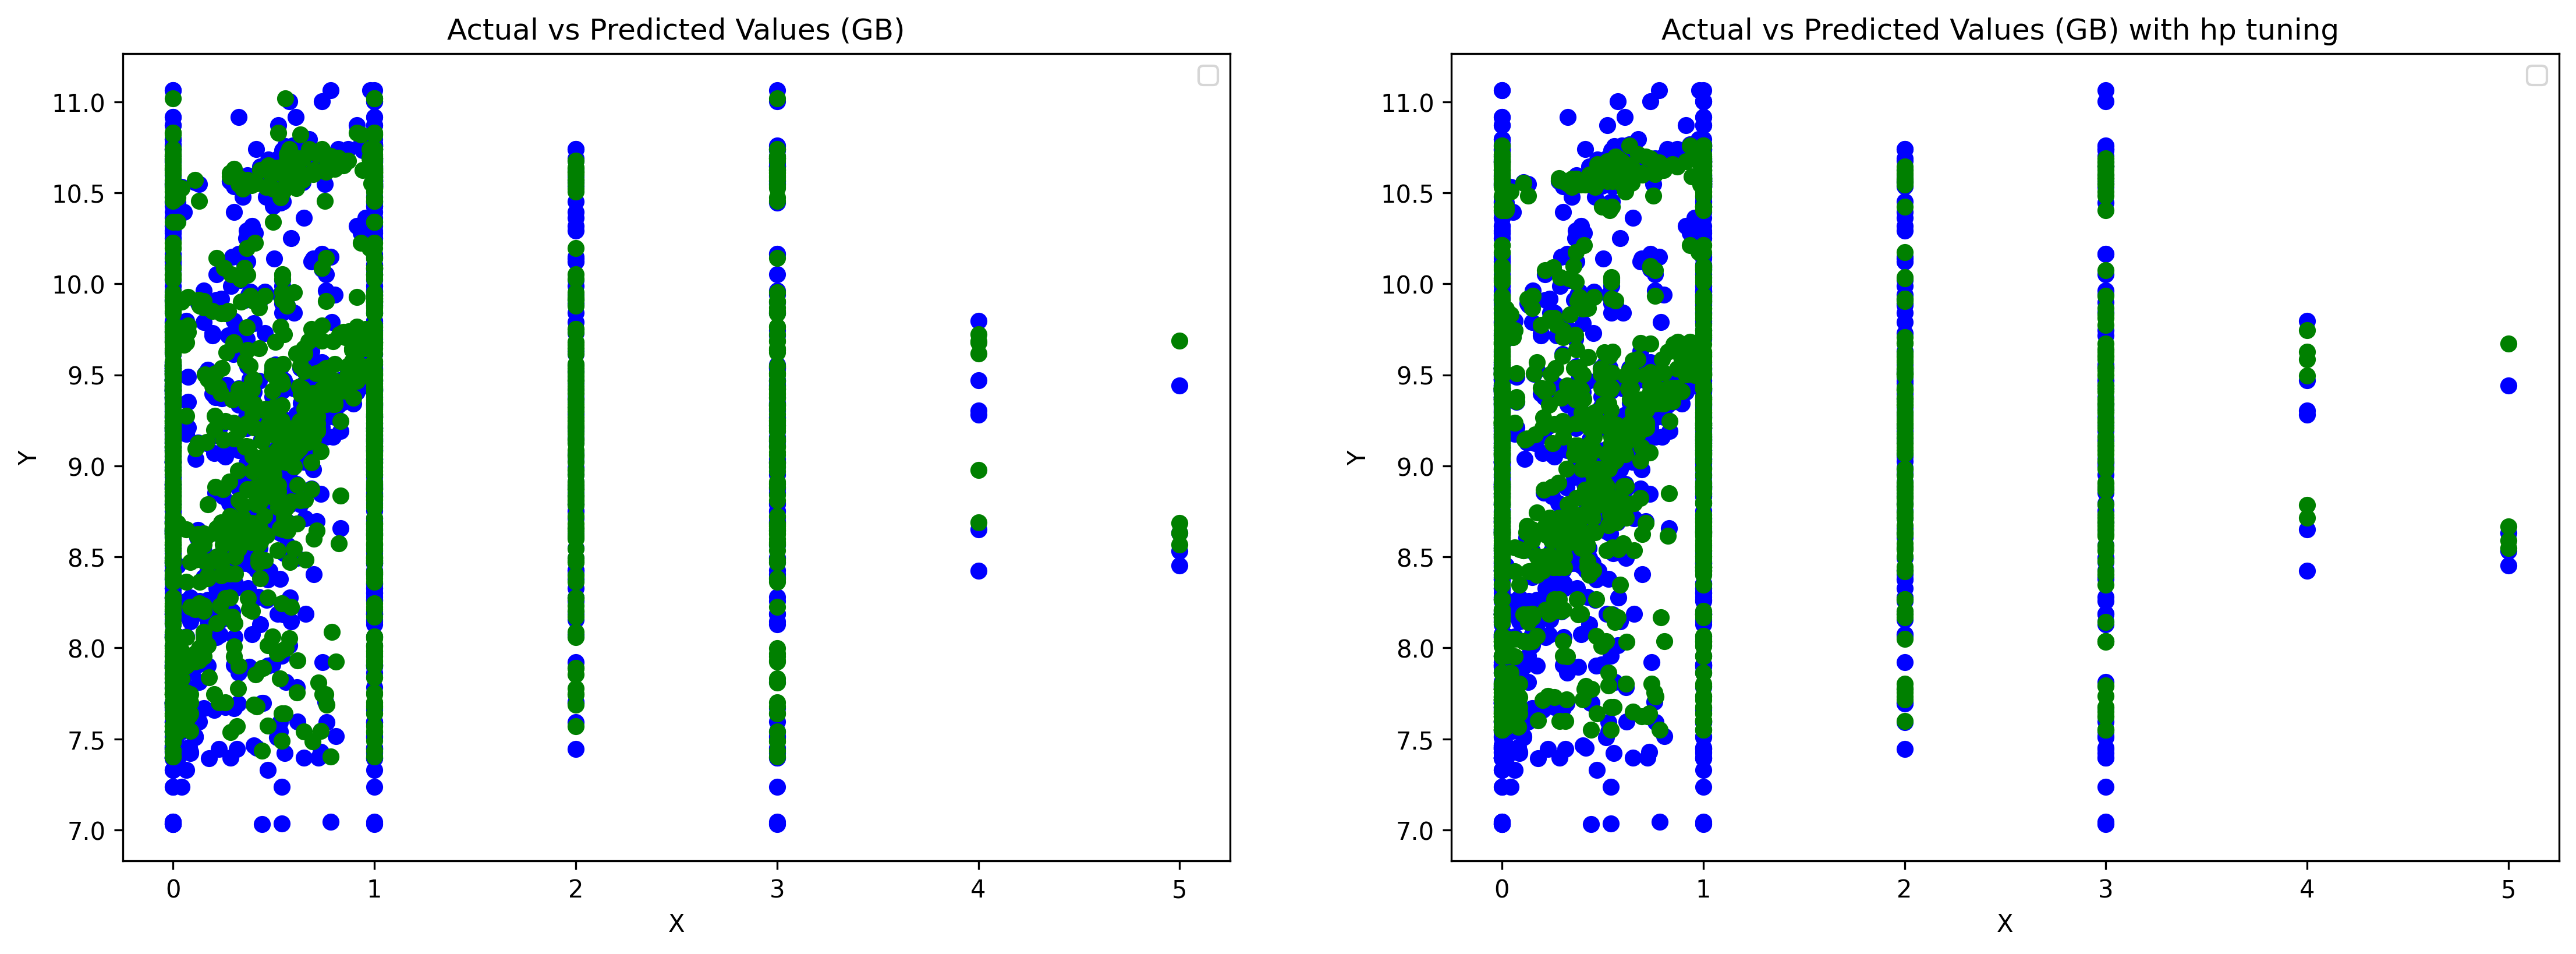

In [73]:
#actual v/s predicted charges graph
plt.figure(figsize=(18, 6),dpi=300)

plt.subplot(1,2,1)
plt.plot(X_test, y_test, 'bo', )
plt.plot(X_test, gb_pred, 'go', )
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs Predicted Values (GB)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(X_test, y_test, 'bo')
plt.plot(X_test, gb_pred_, 'go')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs Predicted Values (GB) with hp tuning ')
plt.legend()
plt.show()

### 7. XGBoost Regression

In [74]:
#XGBoost Regression (XGB)
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)

# Calculate the performance metrics
mae = mean_absolute_error(y_test,xgb_pred)
mse = mean_squared_error(y_test,xgb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,xgb_pred)

metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [mae, mse, rmse, r2]
})

print("XGBoost Regression Metrics")
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False))

XGBoost Regression Metrics
+-----------+---------------------+
|  Metric   |        Value        |
+-----------+---------------------+
|    MAE    | 0.23802462612428302 |
|    MSE    | 0.18058959282361092 |
|   RMSE    | 0.4249583424567765  |
| R-squared | 0.8054368961720126  |
+-----------+---------------------+


In [75]:
#with hyper-parameter tuning
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'gamma': [0, 0.1, 0.2]
}

xgb = XGBRegressor()
xgb_scoring = make_scorer(mean_squared_error, greater_is_better=False)
xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring=xgb_scoring, cv=5, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters and best model
xgb_best_params = xgb_grid_search.best_params_
xgb_best_model = xgb_grid_search.best_estimator_
xgb_pred_ = xgb_best_model.predict(X_test)

# Calculate the performance metrics
mae = mean_absolute_error(y_test, xgb_pred_)
mse = mean_squared_error(y_test, xgb_pred_)
rmse = np.sqrt(mse)
r2_xgb = r2_score(y_test, xgb_pred_)

metrics_df = pd.DataFrame({
    'Metric': ['Best Parameters','MAE', 'MSE', 'RMSE', 'R-squared'],
    'Value': [xgb_best_params,mae, mse, rmse, r2_xgb]
})

print("XGBoost Regression Metrics after Hyper-parameter Tuning")
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False))


XGBoost Regression Metrics after Hyper-parameter Tuning
+-----------------+----------------------------------------------------------------------------+
|     Metric      |                                   Value                                    |
+-----------------+----------------------------------------------------------------------------+
| Best Parameters | {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500} |
|       MAE       |                            0.18369661688258998                             |
|       MSE       |                            0.10792470890173274                             |
|      RMSE       |                            0.32851896277343373                             |
|    R-squared    |                             0.883724382920765                              |
+-----------------+----------------------------------------------------------------------------+


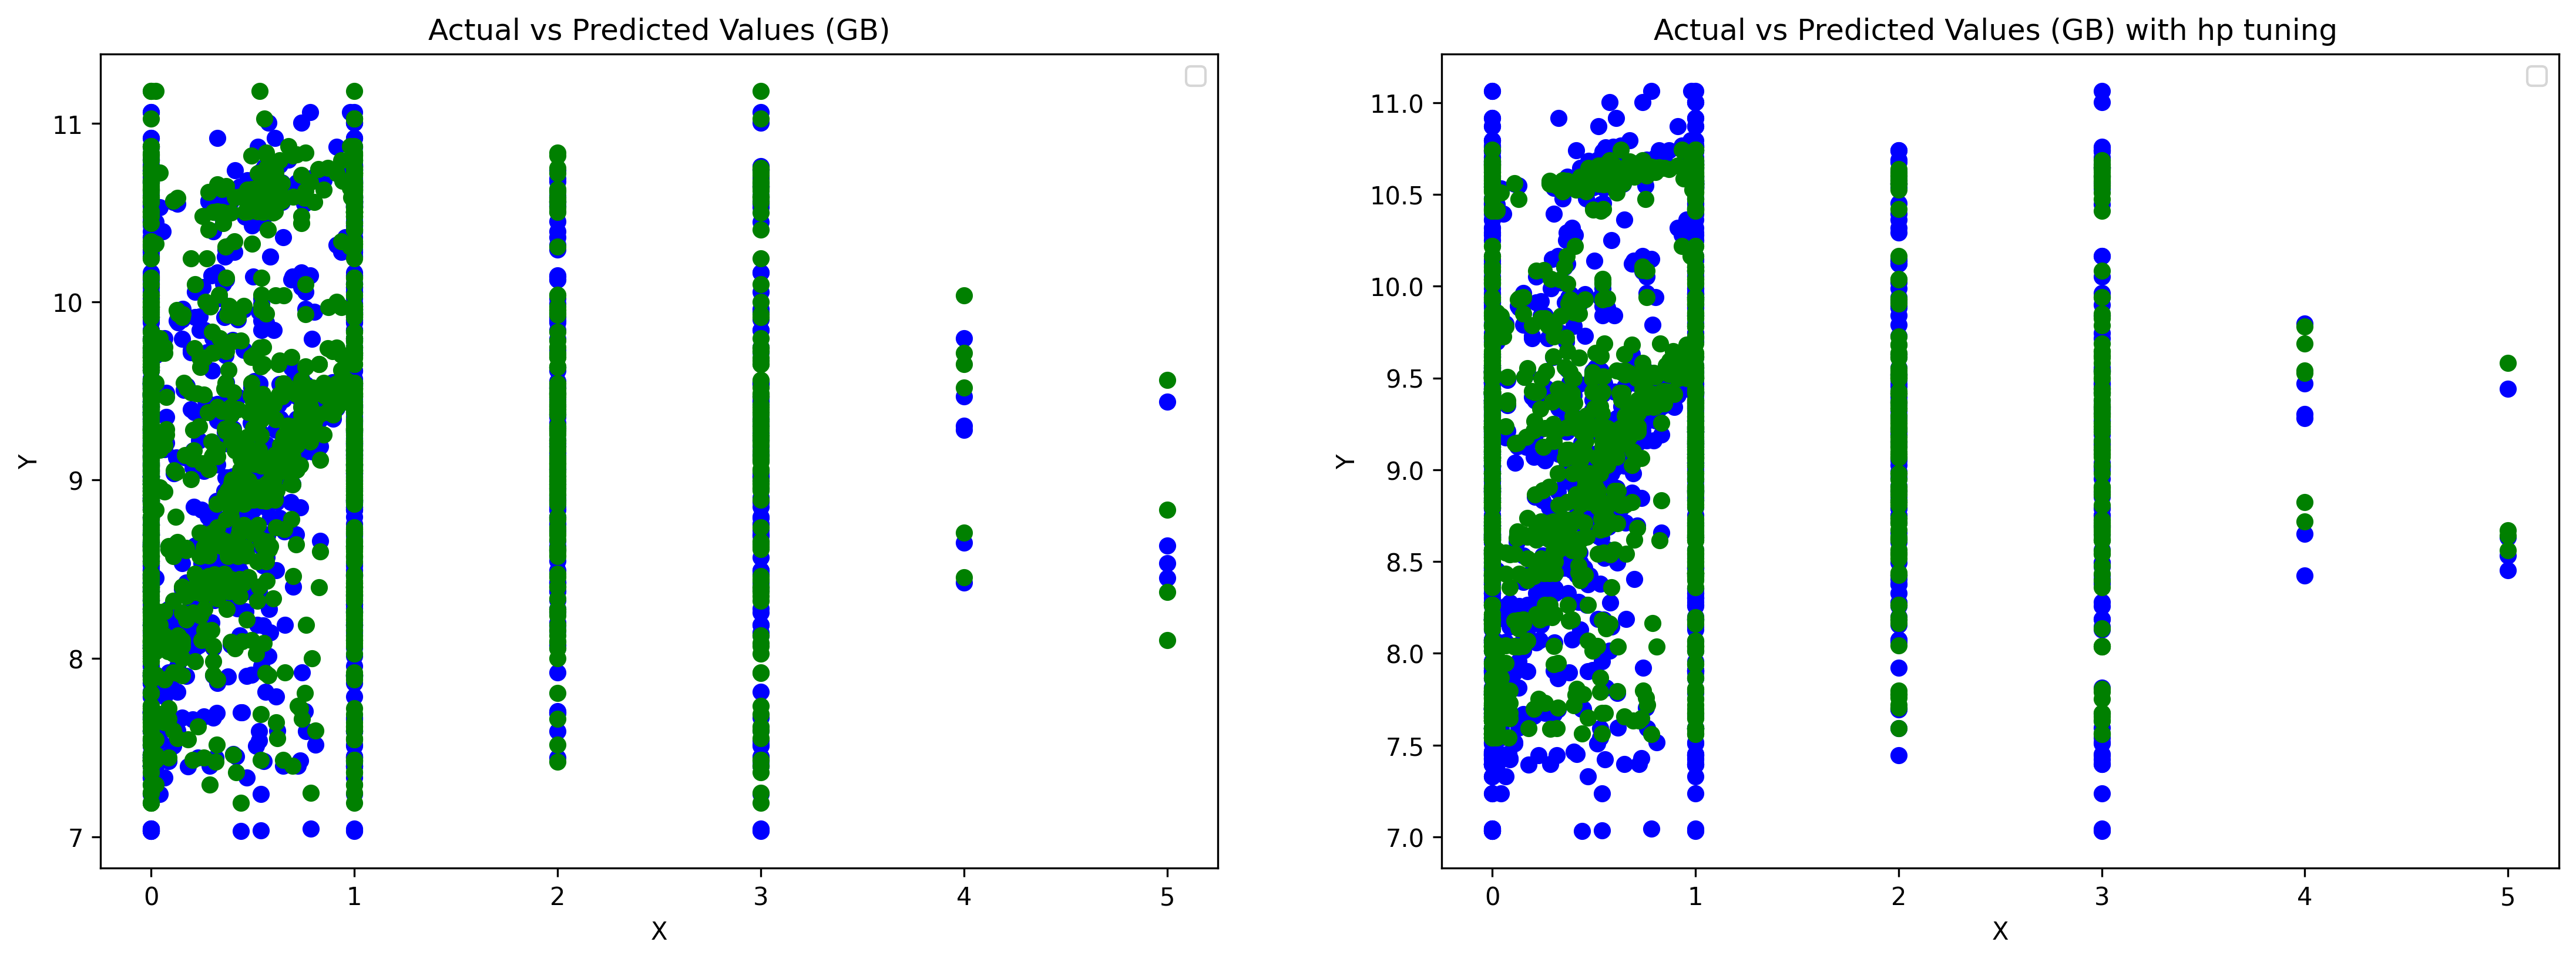

In [76]:
#actual v/s predicted charges graph
plt.figure(figsize=(18, 6),dpi=300)

plt.subplot(1,2,1)
plt.plot(X_test, y_test, 'bo', )
plt.plot(X_test, xgb_pred, 'go', )
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs Predicted Values (GB)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(X_test, y_test, 'bo')
plt.plot(X_test, xgb_pred_, 'go')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs Predicted Values (GB) with hp tuning ')
plt.legend()
plt.show()

In [77]:
r2_scores = [r2_lr, r2_dt, r2_knn, r2_svm, r2_rf, r2_gb, r2_xgb]
best_params = [None,dt_best_params, knn_best_params, svm_best_params, rf_best_params, gb_best_params, xgb_best_params]
model_names = ['Linear Regression', 'Decision Tree', 'K-Nearest Neighbors','Support Vector','Random Forest','Gradient Boosting','XGBoost Regression']

# Create a DataFrame using a dictionary
r2_df = pd.DataFrame({
    'Model': model_names,
    'R-squared': r2_scores,
    'Best Parameters': best_params
  })
r2_df_sorted = r2_df.sort_values(by='R-squared', ascending=False).reset_index(drop=True)
print(tabulate(r2_df_sorted, headers='keys', tablefmt='pretty', showindex=False))

+---------------------+--------------------+----------------------------------------------------------------------------------------+
|        Model        |     R-squared      |                                    Best Parameters                                     |
+---------------------+--------------------+----------------------------------------------------------------------------------------+
|   Support Vector    |  0.88957040195157  |                       {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}                        |
| XGBoost Regression  | 0.883724382920765  |       {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}       |
|  Gradient Boosting  | 0.8835319586960596 |              {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}              |
|    Random Forest    | 0.8652405807532025 |            {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 1000}             |
|    Decision Tree    | 0.8443207702171251 | {'max_depth': 10,

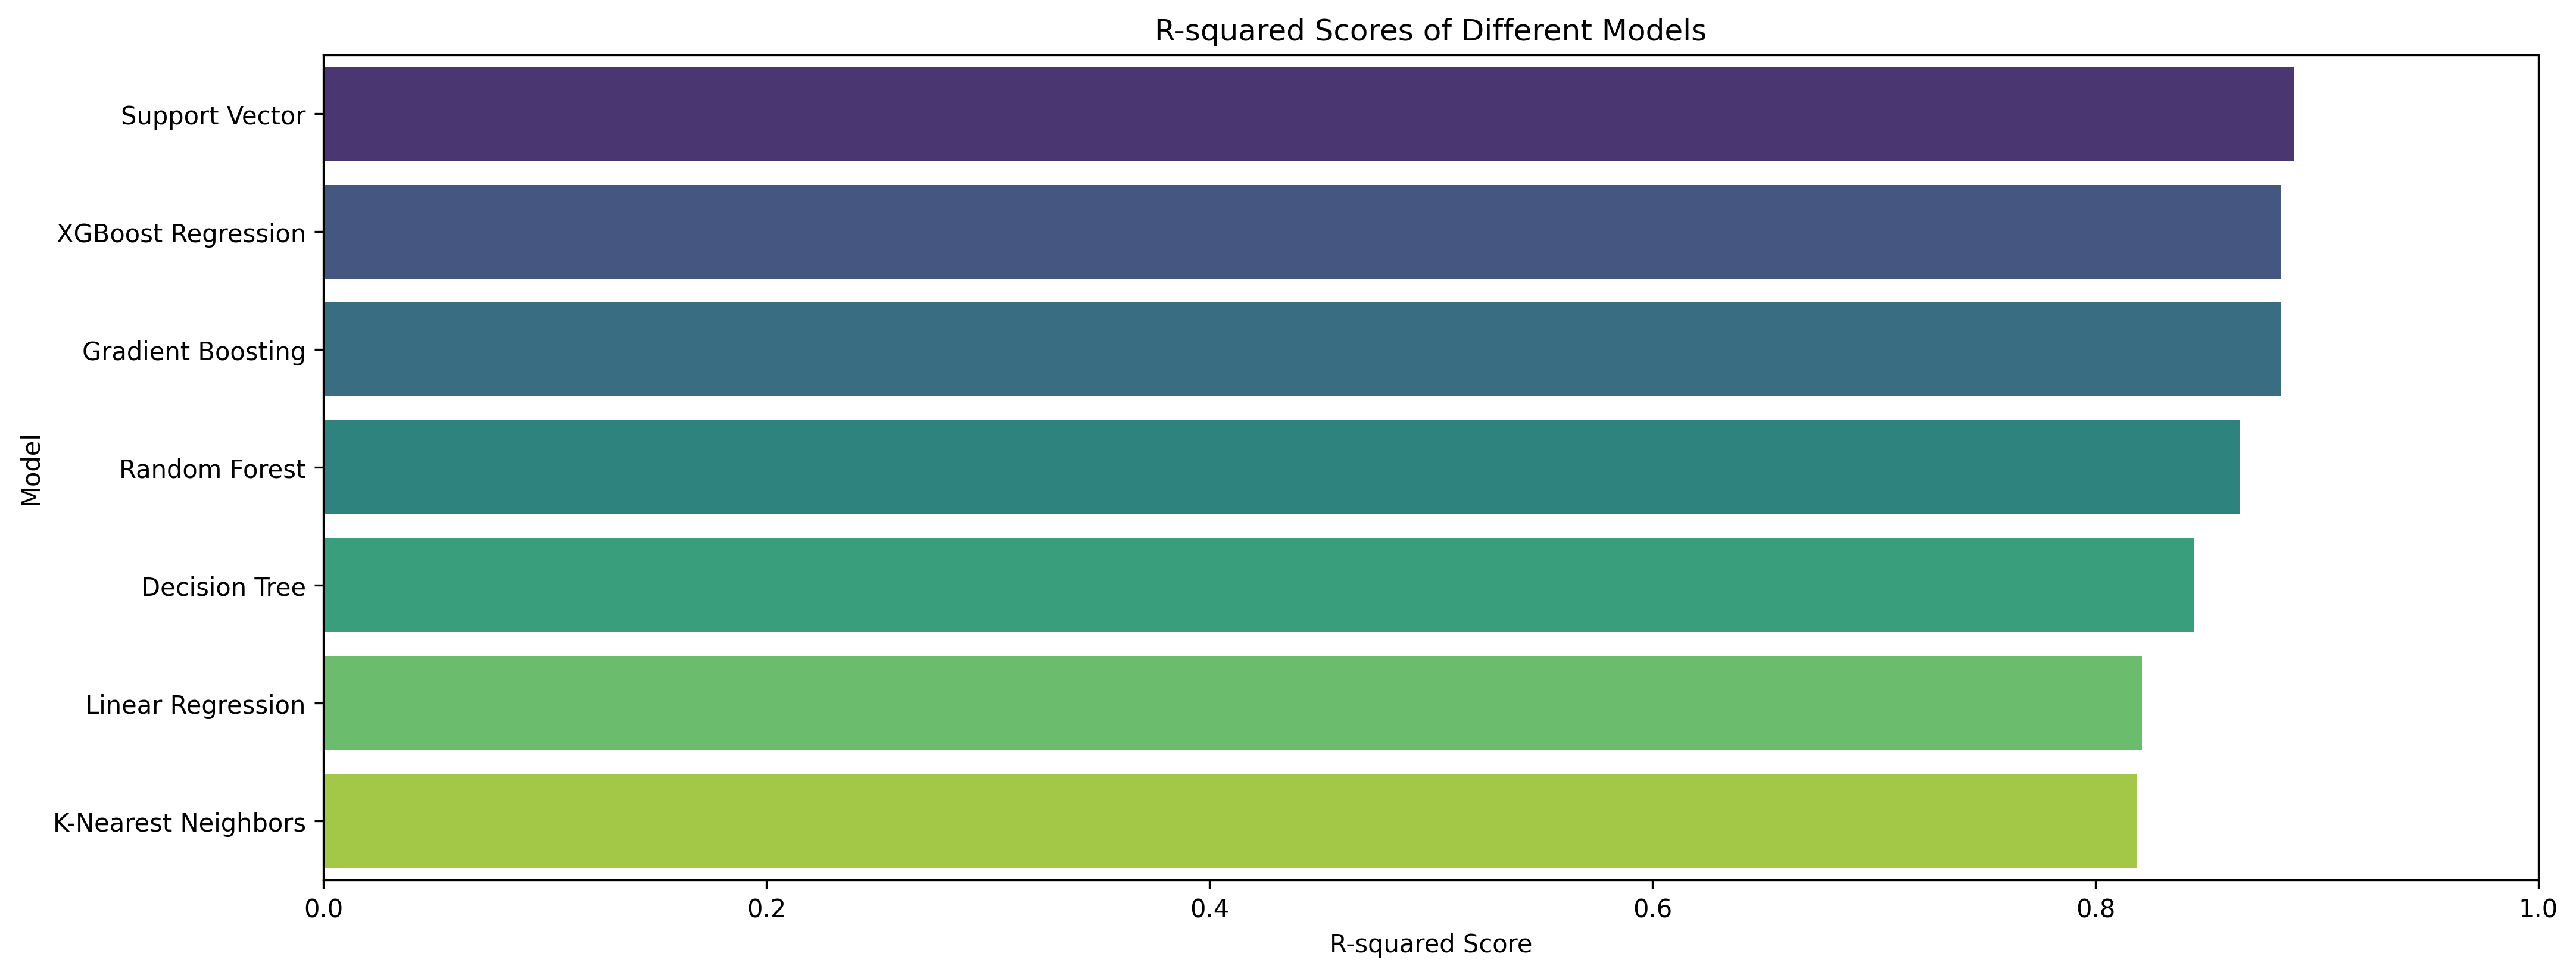

In [78]:
# Plotting the R-squared scores
plt.figure(figsize=(16, 6),dpi=300)
sns.barplot(x='R-squared', y='Model', data=r2_df_sorted, palette='viridis')
plt.xlabel('R-squared Score')
plt.ylabel('Model')
plt.title('R-squared Scores of Different Models')
plt.xlim(0, 1)
plt.show()

### Insights
* SVM shows strong predictive power with optimal parameter settings, making it a robust choice for this regression task.
* XGBoost demonstrates excellent performance and robustness, leveraging boosting techniques effectively for accurate predictions.
* Gradient Boosting performs competitively, highlighting its effectiveness in ensemble learning for regression tasks.
* Random Forest offers strong performance with its ensemble of decision trees, capturing complex relationships in the data.
* Decision Tree performs well but slightly lower compared to ensemble methods like Random Forest and Gradient Boosting.
* Linear Regression, while straightforward, may not capture complex non-linear relationships as effectively as the other models tested.
* KNN provides reasonable predictive performance but is outperformed by more sophisticated models like SVM and ensemble methods.

### Step : Model Deployment

In [79]:
import pickle

In [80]:
new_ob = np.array([[19,0,27,0,1,0],[49,1,22.515,0,0,2],[29,0,25.6,4,0,0]])
scaler=MinMaxScaler()
new_ob_scaled = scaler.fit_transform(new_ob)

In [81]:
#linear regression
pickle.dump(lr, open('lr_model.pkl', 'wb'))
lr_model=pickle.load(open('lr_model.pkl','rb'))
lr_model.predict (new_ob_scaled)

array([ 8.30273799,  9.31745913, 10.14115306])

In [82]:
#decision tree
pickle.dump(dt_best_model, open('dt_model.pkl', 'wb'))
dt_model=pickle.load(open('dt_model.pkl','rb'))
dt_model.predict (new_ob_scaled )

array([ 7.62775368,  9.43569868, 10.52180067])

In [83]:
#K-nearest
pickle.dump(knn_best_model, open('knn_model.pkl', 'wb'))
knn_model=pickle.load(open('knn_model.pkl','rb'))
knn_model.predict (new_ob_scaled )

array([ 8.19348539,  9.29829113, 10.32384681])

In [84]:
#Support Vector Machine
pickle.dump(svm_best_model, open('svm_model.pkl', 'wb'))
svm_model=pickle.load(open('svm_model.pkl','rb'))
svm_model.predict (new_ob_scaled )

array([ 7.80066483,  9.65152445, 10.87193575])

In [85]:
#Random Forest
pickle.dump(rf_best_model, open('rf_model.pkl', 'wb'))
rf_model=pickle.load(open('rf_model.pkl','rb'))
rf_model.predict (new_ob_scaled )

array([ 7.98476657,  9.21304011, 10.48147175])

In [86]:
#Gradient boosting
pickle.dump(gb_best_model, open('gb_model.pkl', 'wb'))
gb_model=pickle.load(open('gb_model.pkl','rb'))
gb_model.predict (new_ob_scaled )

array([ 7.86682654,  9.47804809, 10.58188697])

In [87]:
#X Gradient boosting
pickle.dump(xgb_best_model, open('xgb_model.pkl', 'wb'))
xgb_model=pickle.load(open('xgb_model.pkl','rb'))
xgb_model.predict (new_ob_scaled )

array([ 7.881274,  9.477652, 10.559061], dtype=float32)

### Since SVM Regression model has 0.8895 R-squared value we will select this model to deploy.